<a href="https://colab.research.google.com/github/Sowmya74/Hamoye_Premiere_Project/blob/main/Premiere_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HAMOYE PROJECT - MODEL DB TEAM**

# **Predicting Future Electrification Needs**

## **Imports**

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
df = pd.read_stata("Electrification_Database.dta")

In [3]:
df.head(10)

countryname countrycode  year  elecrate_total  elecrate_urban  \
0     Albania         ALB  1970           100.0             NaN   
1     Algeria         DZA  1966            33.7            74.0   
2     Algeria         DZA  1969            40.0             NaN   
3     Algeria         DZA  1977            45.8             NaN   
4     Algeria         DZA  1981            59.0             NaN   
5     Algeria         DZA  1985            76.0             NaN   
6     Algeria         DZA  1987            72.7             NaN   
7     Algeria         DZA  1989            84.0             NaN   
8     Algeria         DZA  1993            89.0             NaN   
9     Algeria         DZA  1996            93.0             NaN   

   elecrate_rural  
0             NaN  
1            11.8  
2             NaN  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             NaN  
8             NaN  
9             NaN

In [4]:
df.tail(10)

countryname countrycode  year  elecrate_total  elecrate_urban  \
1025    Zimbabwe         ZWE  1996            34.0            70.0   
1026    Zimbabwe         ZWE  1997            35.0            74.0   
1027    Zimbabwe         ZWE  1998            36.0            78.0   
1028    Zimbabwe         ZWE  1999            39.0            80.0   
1029    Zimbabwe         ZWE  2000            36.0            81.0   
1030    Zimbabwe         ZWE  2001            37.0            82.0   
1031    Zimbabwe         ZWE  2002            39.0            84.0   
1032    Zimbabwe         ZWE  2003            41.0            84.0   
1033    Zimbabwe         ZWE  2004            41.0            85.0   
1034    Zimbabwe         ZWE  2012            40.6             NaN   

      elecrate_rural  
1025            17.0  
1026            16.0  
1027            15.0  
1028            18.0  
1029            18.0  
1030            20.0  
1031            22.0  
1032            23.0  
1033            25.0  
1034             NaN

In [5]:
df.columns

Index(['countryname', 'countrycode', 'year', 'elecrate_total',
       'elecrate_urban', 'elecrate_rural'],
      dtype='object')

In [6]:
print("Information About Dataset","\n")
print(df.info(),"\n")

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countryname     1035 non-null   object 
 1   countrycode     1035 non-null   object 
 2   year            1035 non-null   int16  
 3   elecrate_total  961 non-null    float64
 4   elecrate_urban  596 non-null    float64
 5   elecrate_rural  647 non-null    float64
dtypes: float64(3), int16(1), object(2)
memory usage: 42.6+ KB
None 



In [7]:
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

Describe the Dataset  

              year  elecrate_total  elecrate_urban  elecrate_rural
count  1035.000000      961.000000      596.000000      647.000000
mean   1997.500483       51.653186       70.482843       32.597797
std      13.396814       34.283711       26.659611       33.768346
min    1949.000000        0.200000        0.500000        0.000000
25%    1992.000000       18.900000       49.615647        4.100000
50%    2001.000000       47.000000       77.950000       18.600000
75%    2008.000000       87.500000       95.050000       58.050000
max    2015.000000      100.000000      100.000000      100.000000 



***Data Coverage and Distribution***
1. **Count**:
   - `year`: 1035 records.
   - `elecrate_total`: 961 records (missing 74 values).
   - `elecrate_urban`: 596 records (missing 439 values).
   - `elecrate_rural`: 647 records (missing 388 values).

   This indicates that while the total electrification rate data is fairly comprehensive, there are significant gaps in the urban and rural electrification data.

***Electrification Rates***
2. **Mean Electrification Rates**:
   - Overall electrification rate (`elecrate_total`): 51.65%.
   - Urban electrification rate (`elecrate_urban`): 70.48%.
   - Rural electrification rate (`elecrate_rural`): 32.60%.

   The mean values suggest that urban areas tend to have higher electrification rates compared to rural areas.

3. **Standard Deviation**:
   - `elecrate_total`: 34.28%
   - `elecrate_urban`: 26.66%
   - `elecrate_rural`: 33.77%

   The high standard deviations, especially for rural electrification, indicate considerable variability in electrification rates across different regions and years.

***Range of Values***
4. **Minimum and Maximum Values**:
   - Overall electrification rates range from 0.2% to 100%.
   - Urban electrification rates range from 0.5% to 100%.
   - Rural electrification rates range from 0.0% to 100%.

   The presence of very low minimum values suggests that there are countries or regions with extremely low electrification rates.

***Quartiles***
5. **Quartiles for `elecrate_total`**:
   - 25th percentile: 18.9%
   - 50th percentile (median): 47.0%
   - 75th percentile: 87.5%

   These quartiles indicate that half of the dataset has an electrification rate below 47%, and one-fourth has rates below 18.9%.

6. **Quartiles for `elecrate_urban`**:
   - 25th percentile: 49.62%
   - 50th percentile (median): 77.95%
   - 75th percentile: 95.05%

   The higher quartiles for urban electrification indicate that most urban areas have relatively high electrification rates.

7. **Quartiles for `elecrate_rural`**:
   - 25th percentile: 4.1%
   - 50th percentile (median): 18.6%
   - 75th percentile: 58.05%

   The low quartiles for rural electrification suggest that a significant portion of rural areas has low electrification rates.

***Time Span***
8. **Year**:
   - The dataset spans from 1949 to 2015, covering a wide range of years which can be valuable for trend analysis.

*** Implications for Analysis***
- **Data Imputation**: The gaps in `elecrate_urban` and `elecrate_rural` suggest a need for robust imputation strategies to handle missing data.
- **Trend Analysis**: The wide time span and varying electrification rates can be used to analyze trends over time.
- **Urban vs Rural Disparities**: The significant difference between urban and rural electrification rates highlights the need to address rural electrification in future planning.
- **Variability**: High variability indicates different levels of electrification progress in different regions, which can be factored into predictive modeling.


In [8]:
print("Total Null Values ","\n")
print(df.isnull().sum(),"\n")

Total Null Values  

countryname         0
countrycode         0
year                0
elecrate_total     74
elecrate_urban    439
elecrate_rural    388
dtype: int64 



Using `0` to fill missing values might not always be appropriate, especially in the context of electrification rates. Here’s why:

1. **Misrepresentation of Data**:
   - Filling missing values with `0` could mislead the analysis. A missing value (`NaN`) means no data is available, but `0` could be interpreted as there being no electrification, which may not be accurate.

2. **Statistical Distortion**:
   - Using `0` could significantly distort statistical measures (mean, median, variance) and could negatively impact the training of predictive models.

3. **Growth Rate Calculation**:
   - When calculating growth rates or percentages, `0` can lead to incorrect calculations (e.g., division by zero or artificially inflated/deflated rates).

## **PREPROCESSING**

In [9]:
print(df.year.unique(),"\n")
print("Total Number of Unique Year", df.year.nunique(), "\n")

[1970 1966 1969 1977 1981 1985 1987 1989 1993 1996 2005 2008 2010 2013
 2001 2004 2009 1960 1991 2003 1963 1990 2000 2015 1965 1971 2012 1976
 1982 1995 1997 1998 1999 2002 2011 2006 1992 1994 2014 2007 1988 1972
 1973 1980 1956 1975 1986 1978 1951 1964 1974 1984 1959 1955 1961 1983
 1949 1979 1952 1962 1967 1968 1953 1957 1950] 

Total Number of Unique Year 65 



### **Year-wise percentage of total households in the country who have access to grid electricity in Rural, Urban, and Total Areas**

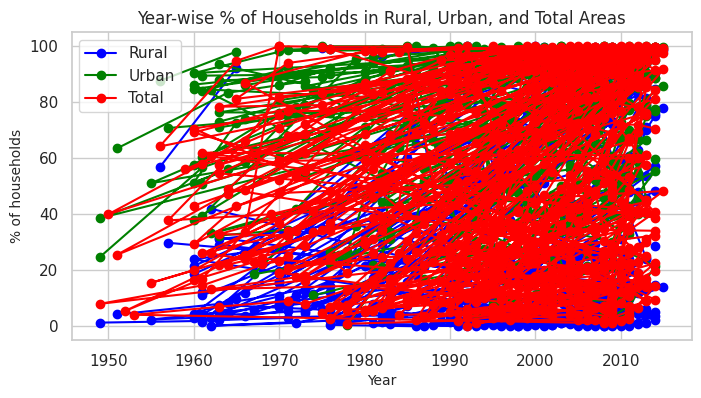

In [10]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot energy consumption over the years
plt.figure(figsize=(8, 4))

# Plot for Rural
plt.plot(df['year'], df['elecrate_rural'], label='Rural', color='blue', marker='o')

# Plot for Urban
plt.plot(df['year'], df['elecrate_urban'], label='Urban', color='green', marker='o')

# Plot for Total
plt.plot(df['year'], df['elecrate_total'], label='Total', color='red', marker='o')

# Adding titles and labels
plt.title('Year-wise % of Households in Rural, Urban, and Total Areas', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')

# Display the plot
plt.show()

### **Year-wise percentage of total households in the country who have access to grid electricity in Rural, Urban, and Total Areas Seperately**

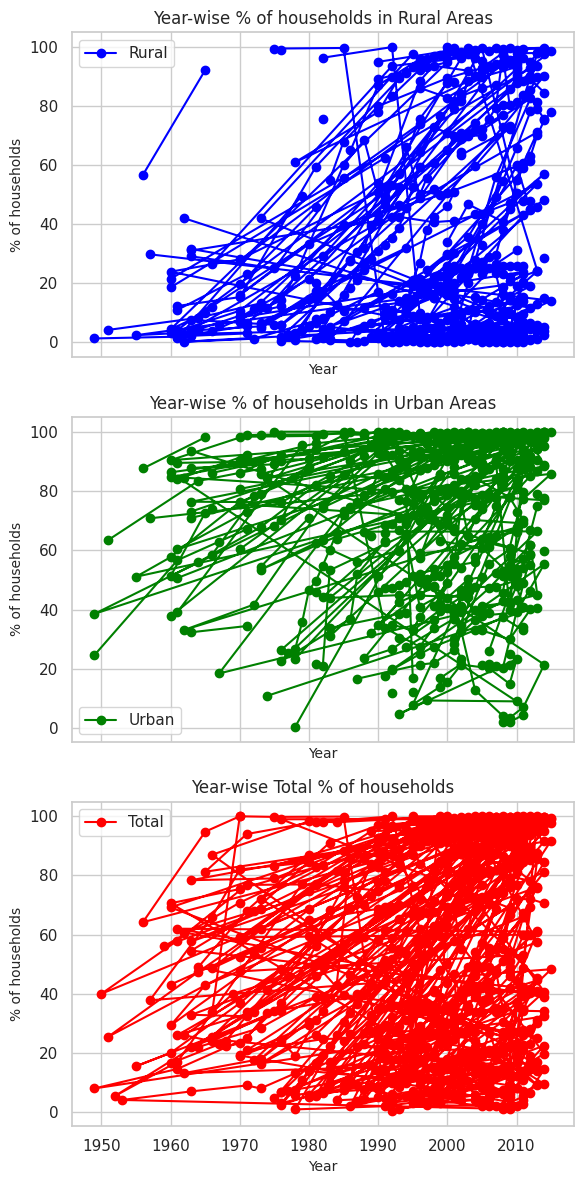

In [11]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot settings
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)
# Plot for Rural energy consumption
axs[0].plot(df['year'], df['elecrate_rural'], label='Rural', color='blue', marker='o')
axs[0].set_title('Year-wise % of households in Rural Areas', fontsize=12)
axs[0].set_xlabel('Year', fontsize=10)
axs[0].set_ylabel('% of households', fontsize=10)
axs[0].legend(loc='best')

# Plot for Urban energy consumption
axs[1].plot(df['year'], df['elecrate_urban'], label='Urban', color='green', marker='o')
axs[1].set_title('Year-wise % of households in Urban Areas', fontsize=12)
axs[1].set_xlabel('Year', fontsize=10)
axs[1].set_ylabel('% of households', fontsize=10)
axs[1].legend(loc='best')

# Plot for Total energy consumption
axs[2].plot(df['year'], df['elecrate_total'], label='Total', color='red', marker='o')
axs[2].set_title('Year-wise Total % of households', fontsize=12)
axs[2].set_xlabel('Year', fontsize=10)
axs[2].set_ylabel('% of households', fontsize=10)
axs[2].legend(loc='best')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


### **Zimbabwe Year-wise % of Rural, Urban and Total households**

     countryname countrycode  year  elecrate_total  elecrate_urban  \
1019    Zimbabwe         ZWE  1990            20.0             NaN   
1020    Zimbabwe         ZWE  1991            20.0            66.0   
1021    Zimbabwe         ZWE  1992            28.0            69.0   
1022    Zimbabwe         ZWE  1993            29.0            67.0   
1023    Zimbabwe         ZWE  1994            31.0            69.0   

      elecrate_rural  
1019             NaN  
1020            10.0  
1021            11.0  
1022            14.0  
1023            15.0  


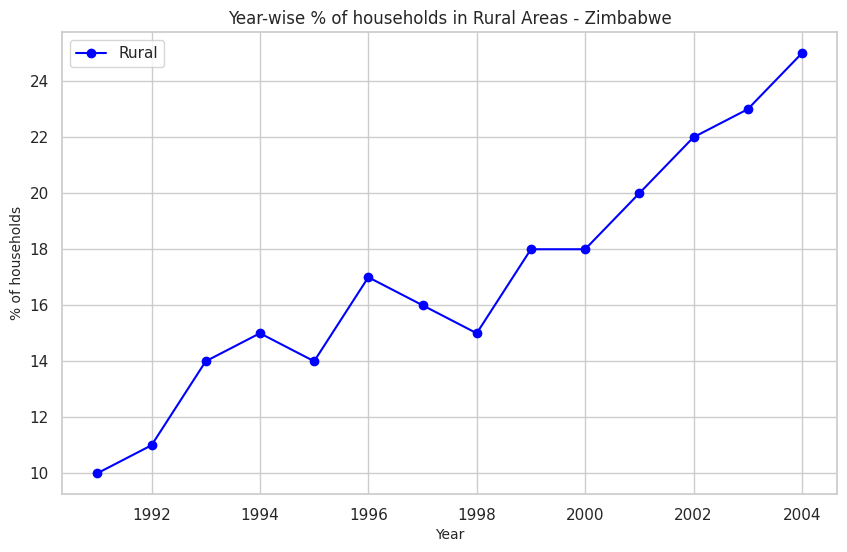

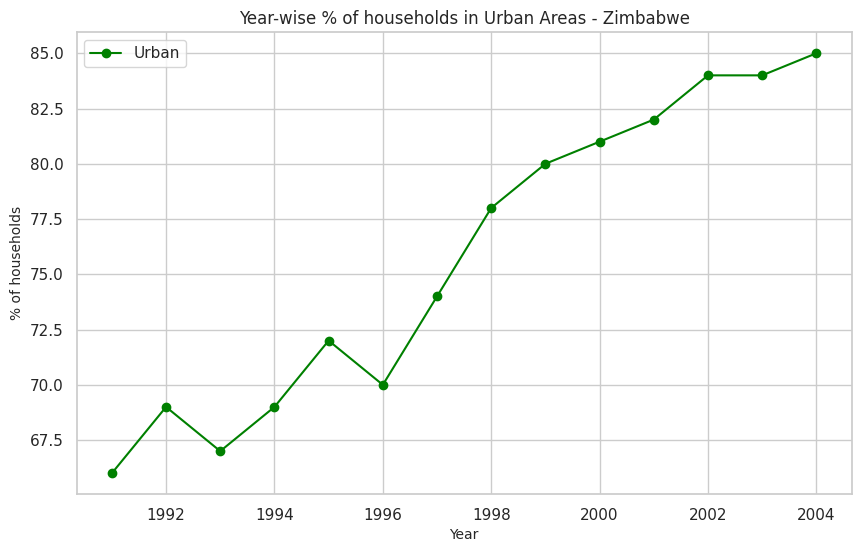

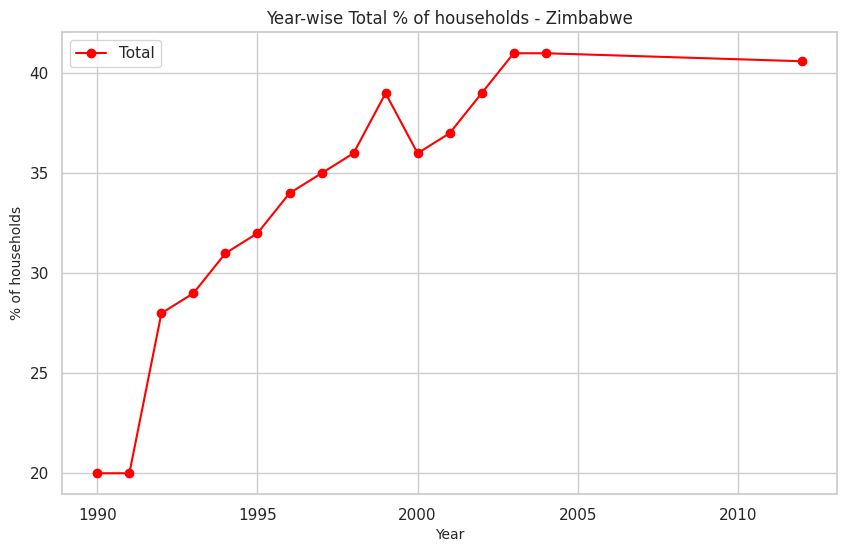

In [12]:
# Specify the country of interest
country_of_interest = 'Zimbabwe'

# Filter the dataset for the particular country
df_country = df[df['countryname'] == country_of_interest]

# Initial data exploration
print(df_country.head())

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot for Rural
plt.figure(figsize=(10, 6))
plt.plot(df_country['year'], df_country['elecrate_rural'], label='Rural', color='blue', marker='o')
plt.title(f'Year-wise % of households in Rural Areas - {country_of_interest}', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')
plt.show()

# Plot for Urban
plt.figure(figsize=(10, 6))
plt.plot(df_country['year'], df_country['elecrate_urban'], label='Urban', color='green', marker='o')
plt.title(f'Year-wise % of households in Urban Areas - {country_of_interest}', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')
plt.show()

# Plot for Total
plt.figure(figsize=(10, 6))
plt.plot(df_country['year'], df_country['elecrate_total'], label='Total', color='red', marker='o')
plt.title(f'Year-wise Total % of households - {country_of_interest}', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')
plt.show()


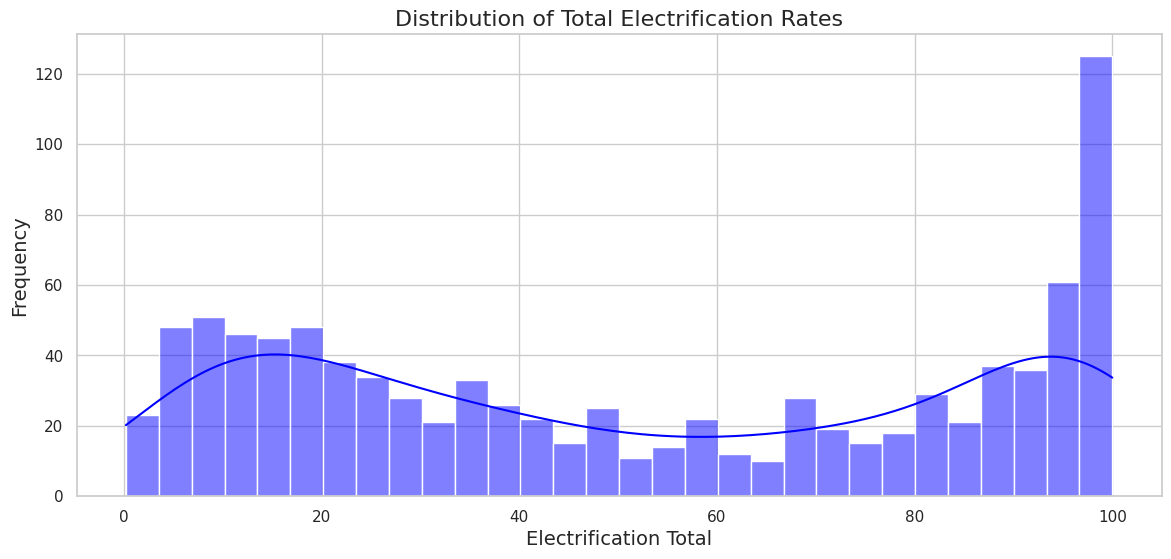

In [13]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the histogram for electrification_total
plt.figure(figsize=(14, 6))
sns.histplot(df['elecrate_total'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Electrification Rates', fontsize=16)
plt.xlabel('Electrification Total', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# **GAN - Synthetic Data Generation for filling NULL values**

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam


# Check for null values
print(df.isnull().sum())

# Handle missing values for 'elecrate_total', 'elecrate_urban', and 'elecrate_rural'
columns_to_impute = ['elecrate_total', 'elecrate_urban', 'elecrate_rural']

# Impute missing values with mean for initial preprocessing
imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Scale the data
scaler = MinMaxScaler()
df_scaled = df_imputed.copy()
df_scaled[columns_to_impute] = scaler.fit_transform(df_imputed[columns_to_impute])

# GAN architecture

# Generator
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(output_dim, activation='linear'))
    return model

# Discriminator
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile GAN
def compile_gan(generator, discriminator):
    discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')
    return gan

# Hyperparameters
latent_dim = 100
input_dim = len(columns_to_impute)
batch_size = 32
epochs = 10000

# Build and compile models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)
gan = compile_gan(generator, discriminator)

# Training GAN
def train_gan(gan, generator, discriminator, epochs, batch_size, data):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for epoch in range(epochs):
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, valid)
        d_loss_fake = discriminator.train_on_batch(gen_data, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

# Train the GAN
train_gan(gan, generator, discriminator, epochs, batch_size, df_scaled[columns_to_impute].values)

# Generate synthetic data
noise = np.random.normal(0, 1, (df_scaled.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)

# Integrate synthetic data for missing values
df_filled = df.copy()
for i, col in enumerate(columns_to_impute):
    df_filled.loc[df[col].isnull(), col] = synthetic_data[df[col].isnull(), i]

# Display the head of the filled dataframe
print(df_filled.head())


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
6000 [D loss: 0.5666722655296326 | D accuracy: 93.75] [G loss: 0.8101233839988708]
1/1 [==============================] - 0s 23ms/step
7000 [D loss: 0.6457131505012512 | D accuracy: 65.625] [G loss: 0.7482789754867554]
1/1 [==============================] - 0s 20ms/step
8000 [D loss: 0.6412466168403625 | D accuracy: 71.875] [G loss: 0.7718265056610107]
1/1 [==============================] - 0s 23ms/step
9000 [D loss: 0.6149817109107971 | D accuracy: 60.9375] [G loss: 1.2733066082000732]
33/33 [==============================] - 0s 2ms/step
  countryname countrycode  year  elecrate_total  elecrate_urban  \
0     Albania         ALB  1970           100.0       68.631233   
1     Algeria         DZA  1966            33.7       74.000000   
2     Algeria         DZA  1969            40.0       66.964142   
3     Algeria         DZA  1977            45.8       81.084442   
4     Algeria    

In [15]:
# Display the head of the filled dataframe
df_filled.head()

countryname countrycode  year  elecrate_total  elecrate_urban  \
0     Albania         ALB  1970           100.0       68.631233   
1     Algeria         DZA  1966            33.7       74.000000   
2     Algeria         DZA  1969            40.0       66.964142   
3     Algeria         DZA  1977            45.8       81.084442   
4     Algeria         DZA  1981            59.0       64.229256   

   elecrate_rural  
0       18.809496  
1       11.800000  
2       14.424832  
3       32.651169  
4       21.311750

In [16]:
print("Total Null Values ","\n")
print(df_filled.isnull().sum(),"\n")

Total Null Values  

countryname       0
countrycode       0
year              0
elecrate_total    0
elecrate_urban    0
elecrate_rural    0
dtype: int64 



# **Exploratory Data Analysis**

### **Zimbabwe Year-wise % of Rural, Urban and Total households after filling null values**

     countryname countrycode  year  elecrate_total  elecrate_urban  \
1019    Zimbabwe         ZWE  1990            20.0       76.858742   
1020    Zimbabwe         ZWE  1991            20.0       66.000000   
1021    Zimbabwe         ZWE  1992            28.0       69.000000   
1022    Zimbabwe         ZWE  1993            29.0       67.000000   
1023    Zimbabwe         ZWE  1994            31.0       69.000000   

      elecrate_rural  
1019       25.181557  
1020       10.000000  
1021       11.000000  
1022       14.000000  
1023       15.000000  


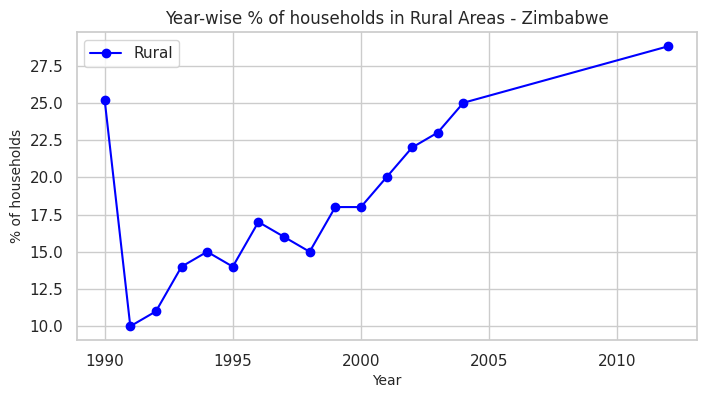

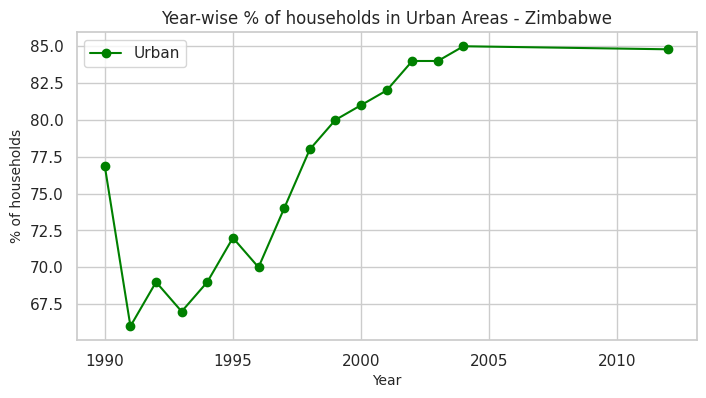

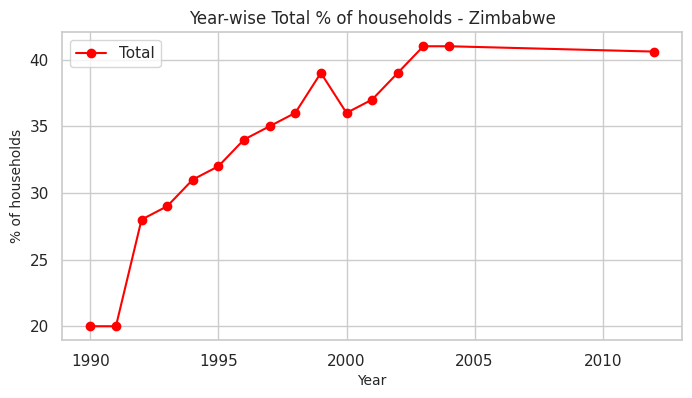

In [17]:
# Specify the country of interest
country_of_interest = 'Zimbabwe'

# Filter the dataset for the particular country
df_filled_country = df_filled[df_filled['countryname'] == country_of_interest]

# Initial data exploration
print(df_filled_country.head())

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot for Rural energy consumption
plt.figure(figsize=(8, 4))
plt.plot(df_filled_country['year'], df_filled_country['elecrate_rural'], label='Rural', color='blue', marker='o')
plt.title(f'Year-wise % of households in Rural Areas - {country_of_interest}', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')
plt.show()

# Plot for Urban energy consumption
plt.figure(figsize=(8, 4))
plt.plot(df_filled_country['year'], df_filled_country['elecrate_urban'], label='Urban', color='green', marker='o')
plt.title(f'Year-wise % of households in Urban Areas - {country_of_interest}', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')
plt.show()

# Plot for Total energy consumption
plt.figure(figsize=(8, 4))
plt.plot(df_filled_country['year'], df_filled_country['elecrate_total'], label='Total', color='red', marker='o')
plt.title(f'Year-wise Total % of households - {country_of_interest}', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('% of households', fontsize=10)
plt.legend(loc='best')
plt.show()



Correlation matrix (numeric columns only):
                elecrate_total  elecrate_urban  elecrate_rural
elecrate_total        1.000000        0.625125        0.591756
elecrate_urban        0.625125        1.000000        0.693762
elecrate_rural        0.591756        0.693762        1.000000


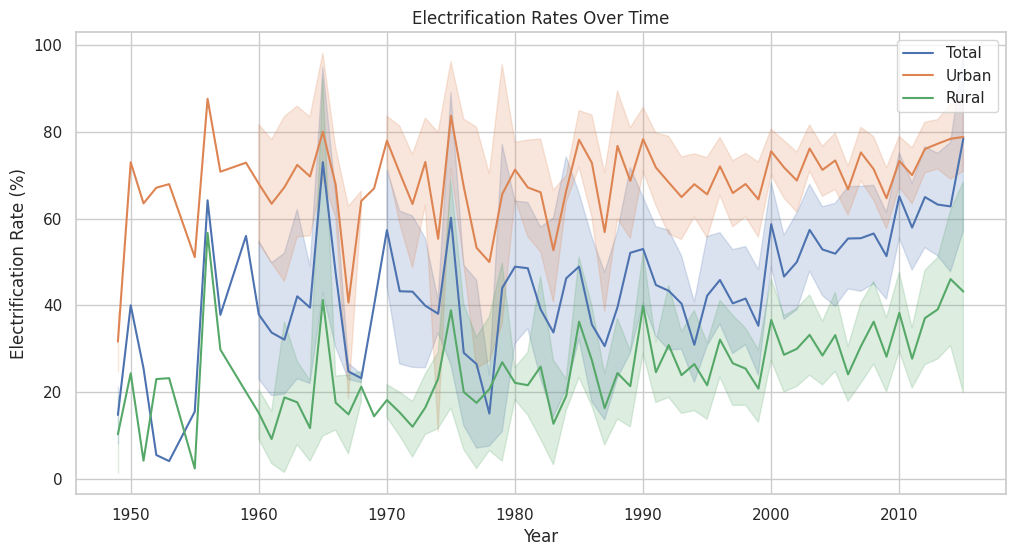

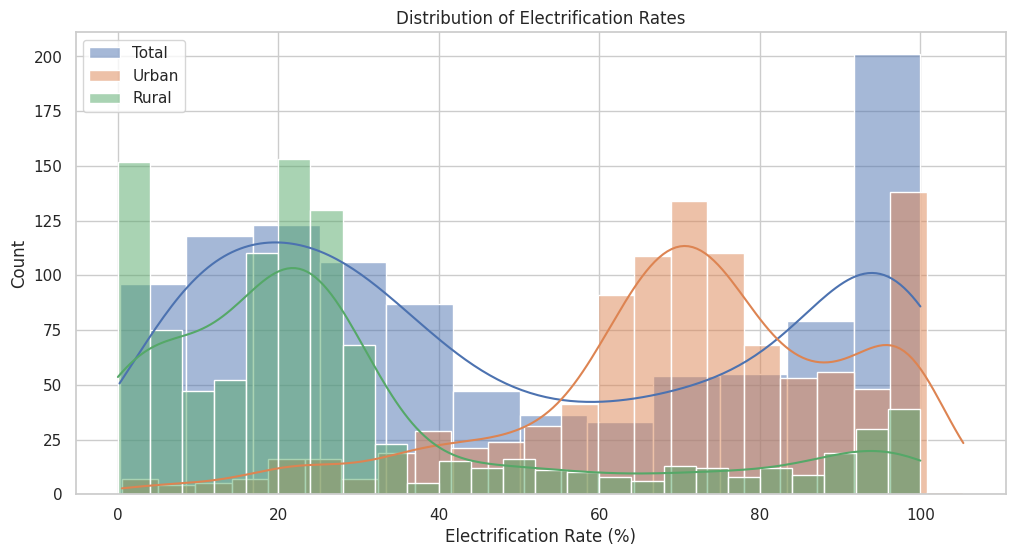

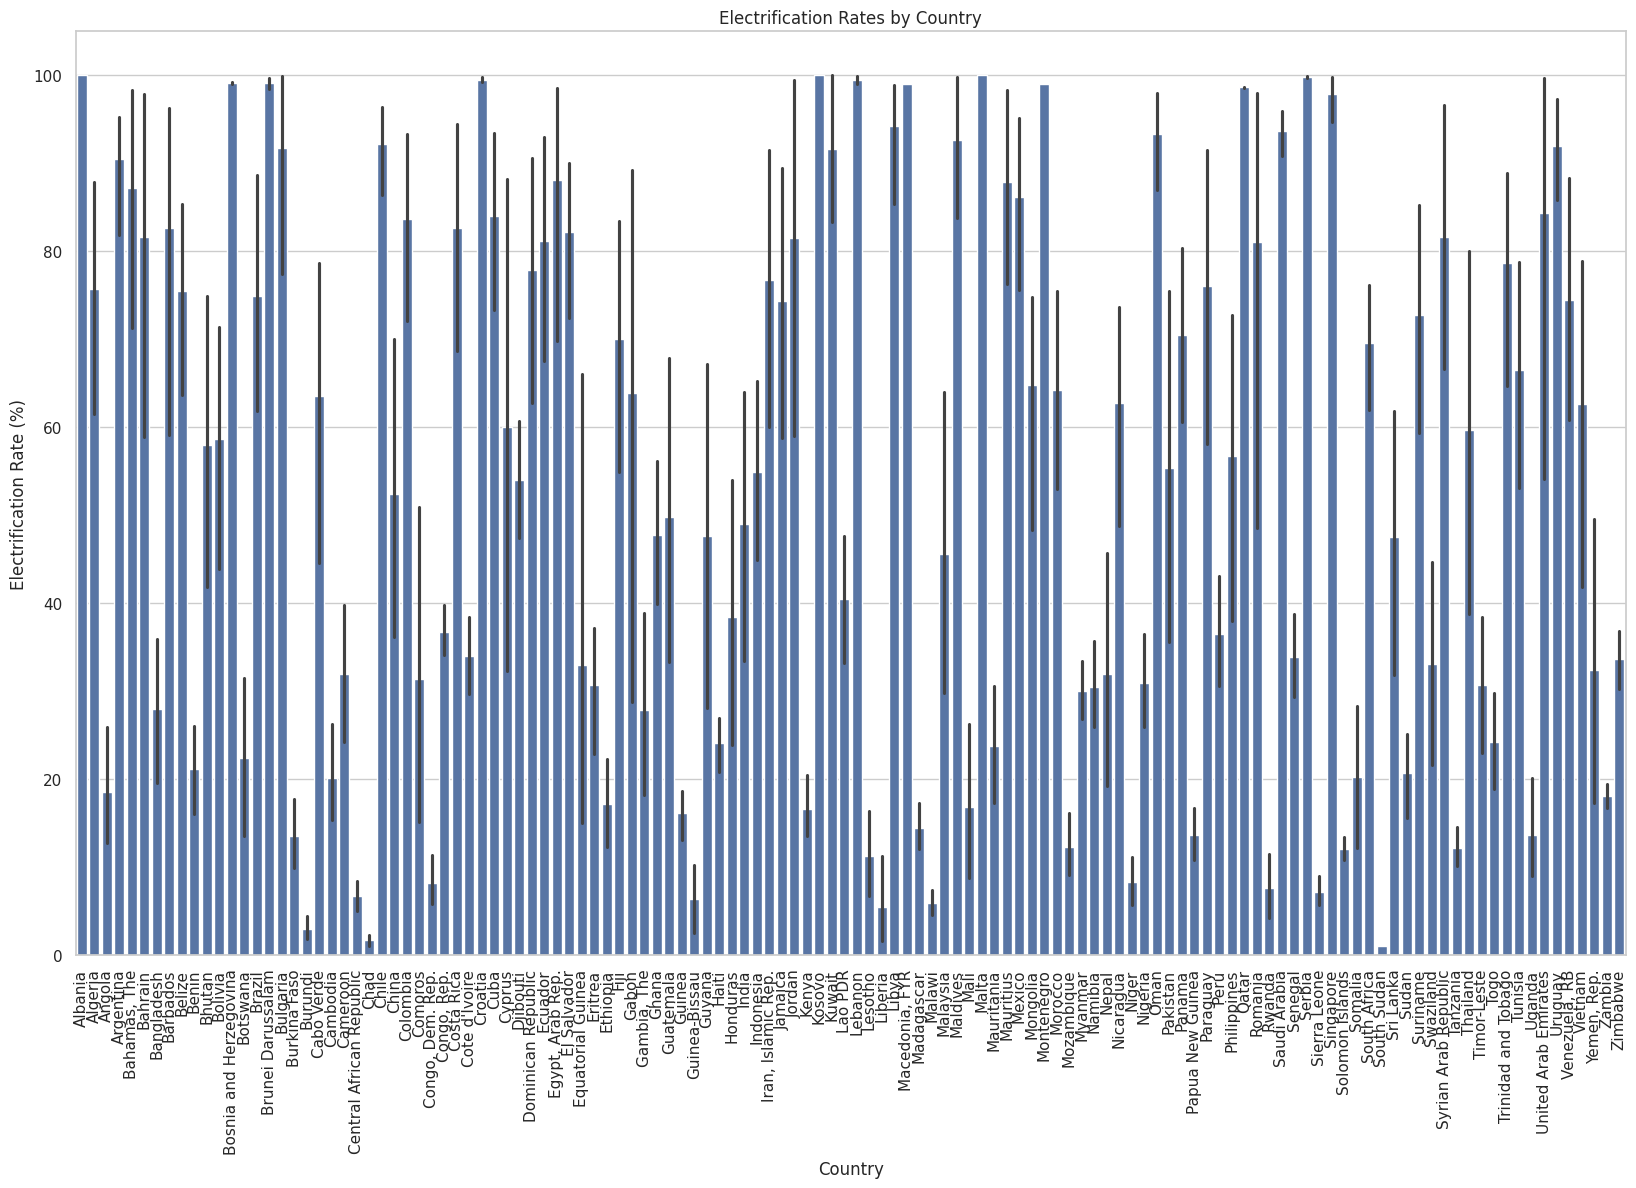

In [18]:
# Correlation matrix (excluding non-numeric columns)
numeric_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns
print("\nCorrelation matrix (numeric columns only):")
print(df_filled[numeric_cols].corr())


# Visualize electrification rates over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filled, x='year', y='elecrate_total', label='Total')
sns.lineplot(data=df_filled, x='year', y='elecrate_urban', label='Urban')
sns.lineplot(data=df_filled, x='year', y='elecrate_rural', label='Rural')
plt.title('Electrification Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Electrification Rate (%)')
plt.legend()
plt.show()

# Visualize the distribution of electrification rates
plt.figure(figsize=(12, 6))
sns.histplot(data=df_filled, x='elecrate_total', kde=True, label='Total')
sns.histplot(data=df_filled, x='elecrate_urban', kde=True, label='Urban')
sns.histplot(data=df_filled, x='elecrate_rural', kde=True, label='Rural')
plt.title('Distribution of Electrification Rates')
plt.xlabel('Electrification Rate (%)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Visualize electrification rates by country
plt.figure(figsize=(20, 12))
sns.barplot(data=df_filled, x='countryname', y='elecrate_total')
plt.xticks(rotation=90)
plt.title('Electrification Rates by Country')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()

### **Top 10 and bottom 10 Countries total households Electrification Rate**

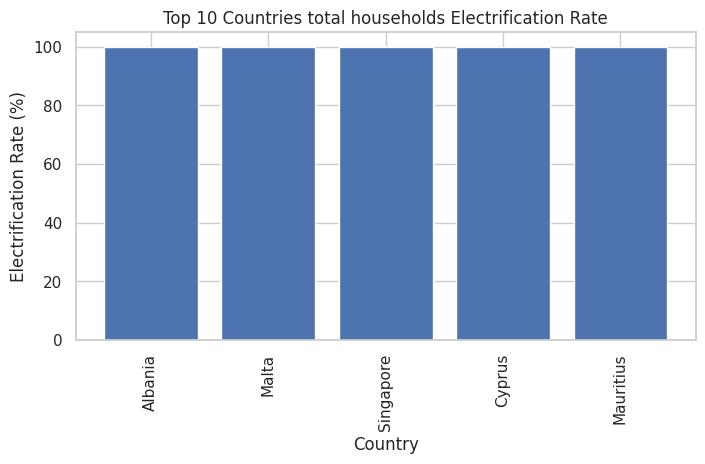

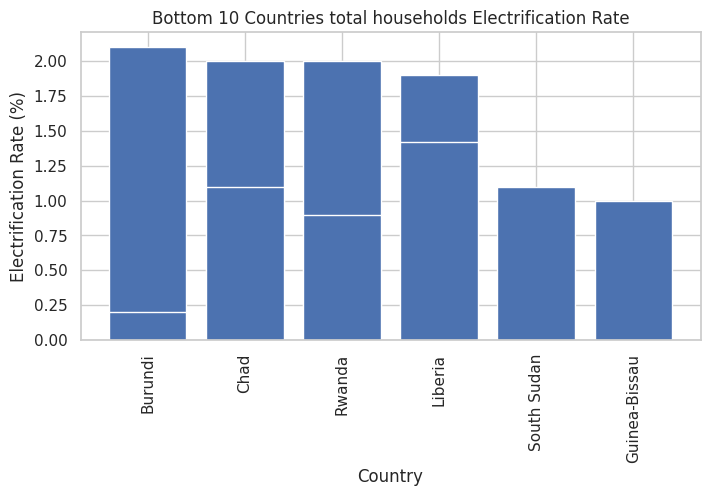

In [19]:
# Sort the dataset by electrification rate in descending order
df_sorted = df_filled.sort_values(by='elecrate_total', ascending=False)


# Get the top 10 countries by electrification rate
top_10 = df_sorted.head(10)

# Get the bottom 10 countries by electrification rate
bottom_10 = df_sorted.tail(10)

# Visualize the top 10 countries
plt.figure(figsize=(8, 4))
plt.bar(top_10['countryname'], top_10['elecrate_total'])
plt.xticks(rotation=90)
plt.title('Top 10 Countries total households Electrification Rate')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()

# Visualize the bottom 10 countries
plt.figure(figsize=(8, 4))
plt.bar(bottom_10['countryname'], bottom_10['elecrate_total'])
plt.xticks(rotation=90)
plt.title('Bottom 10 Countries total households Electrification Rate')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()


### **Top 10 and bottom 10 Countries Urban households Electrification Rate**

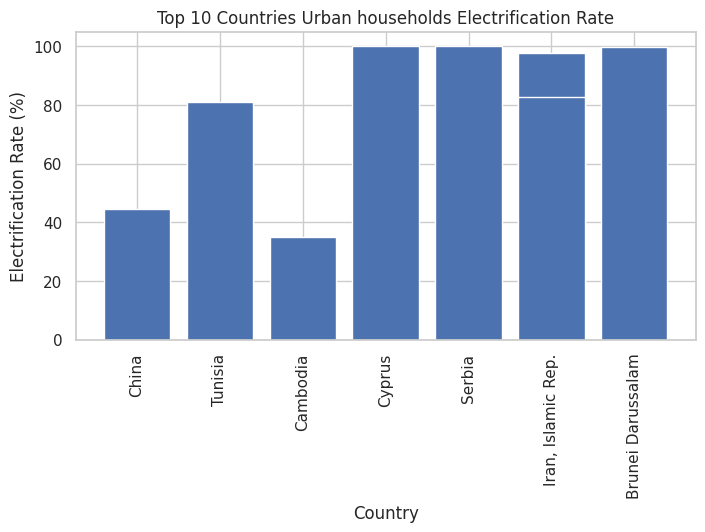

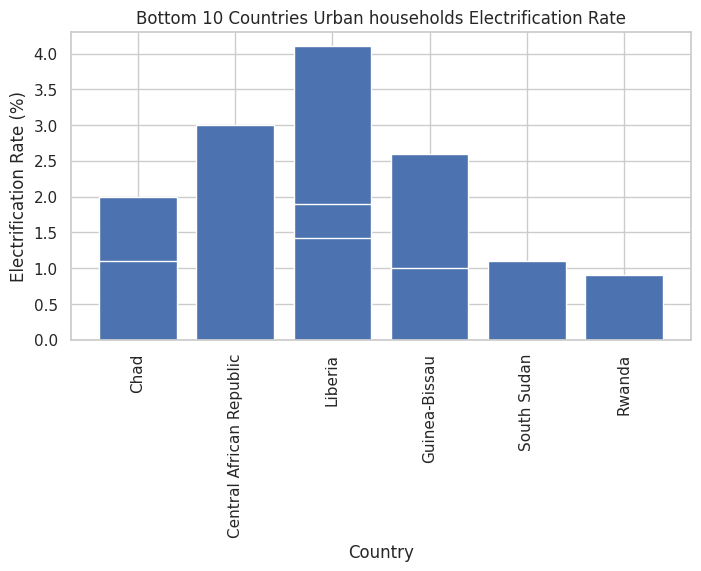

In [20]:
# Sort the dataset by electrification rate in descending order
df_sorted = df_filled.sort_values(by='elecrate_urban', ascending=False)


# Get the top 10 countries by electrification rate
top_10 = df_sorted.head(10)

# Get the bottom 10 countries by electrification rate
bottom_10 = df_sorted.tail(10)

# Visualize the top 10 countries
plt.figure(figsize=(8, 4))
plt.bar(top_10['countryname'], top_10['elecrate_total'])
plt.xticks(rotation=90)
plt.title('Top 10 Countries Urban households Electrification Rate')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()

# Visualize the bottom 10 countries
plt.figure(figsize=(8, 4))
plt.bar(bottom_10['countryname'], bottom_10['elecrate_total'])
plt.xticks(rotation=90)
plt.title('Bottom 10 Countries Urban households Electrification Rate')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()


### **Top 10 and bottom 10 Countries Rural households Electrification Rate**

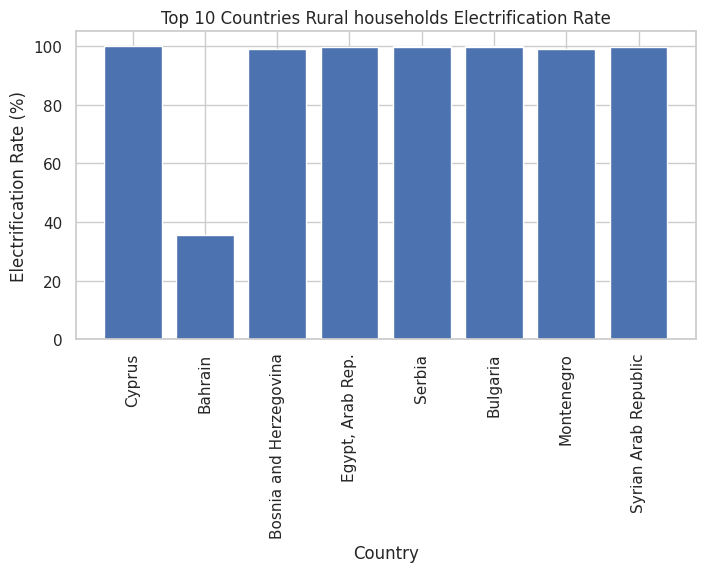

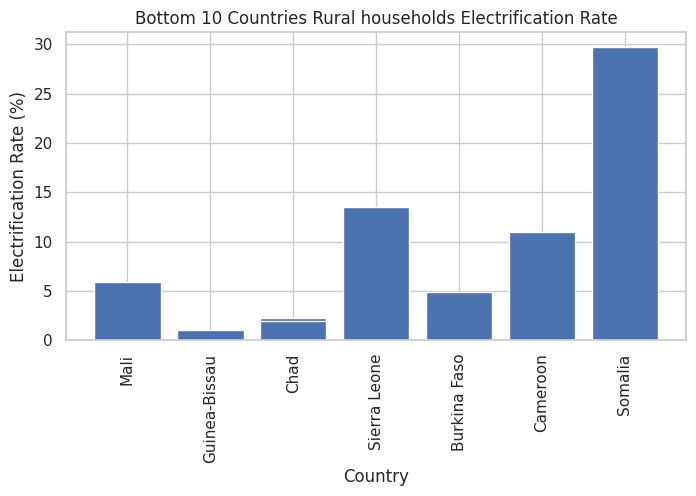

In [21]:
# Sort the dataset by electrification rate in descending order
df_sorted = df_filled.sort_values(by='elecrate_rural', ascending=False)


# Get the top 10 countries by electrification rate
top_10 = df_sorted.head(10)

# Get the bottom 10 countries by electrification rate
bottom_10 = df_sorted.tail(10)

# Visualize the top 10 countries
plt.figure(figsize=(8, 4))
plt.bar(top_10['countryname'], top_10['elecrate_total'])
plt.xticks(rotation=90)
plt.title('Top 10 Countries Rural households Electrification Rate')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()

# Visualize the bottom 10 countries
plt.figure(figsize=(8, 4))
plt.bar(bottom_10['countryname'], bottom_10['elecrate_total'])
plt.xticks(rotation=90)
plt.title('Bottom 10 Countries Rural households Electrification Rate')
plt.xlabel('Country')
plt.ylabel('Electrification Rate (%)')
plt.show()


In [22]:
df.describe()

year  elecrate_total  elecrate_urban  elecrate_rural
count  1035.000000      961.000000      596.000000      647.000000
mean   1997.500483       51.653186       70.482843       32.597797
std      13.396814       34.283711       26.659611       33.768346
min    1949.000000        0.200000        0.500000        0.000000
25%    1992.000000       18.900000       49.615647        4.100000
50%    2001.000000       47.000000       77.950000       18.600000
75%    2008.000000       87.500000       95.050000       58.050000
max    2015.000000      100.000000      100.000000      100.000000

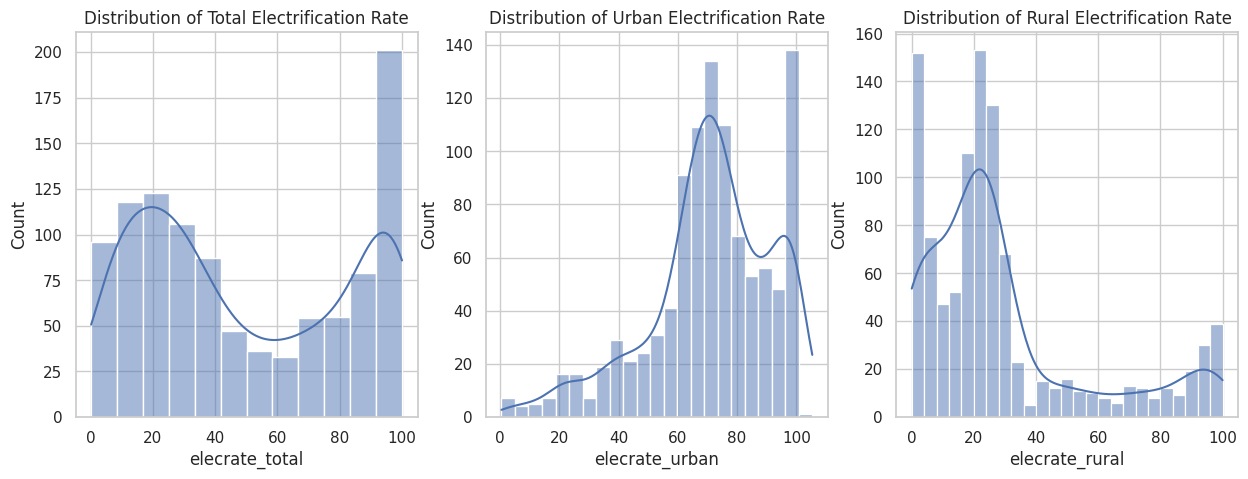

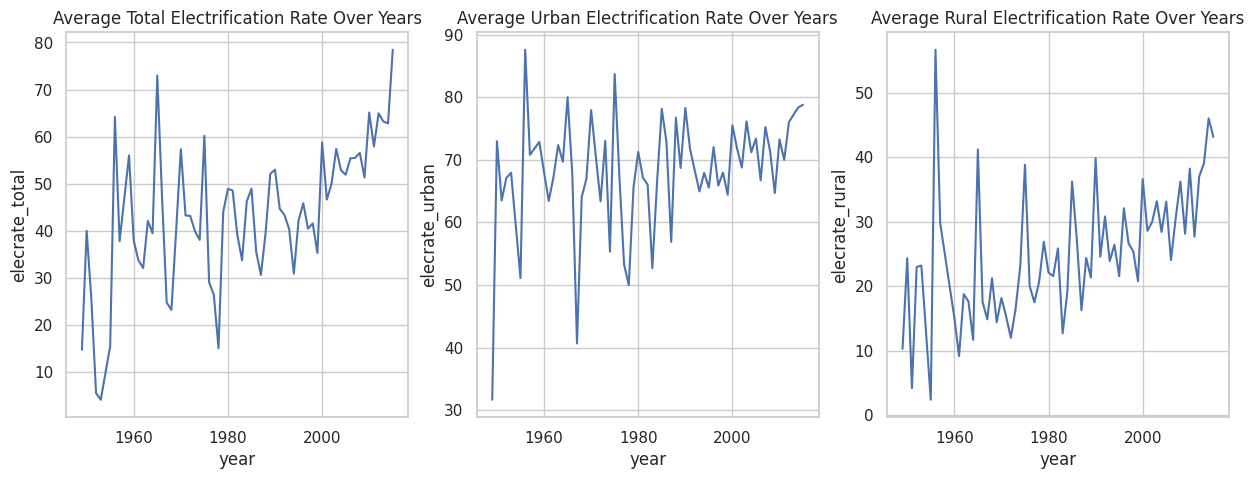

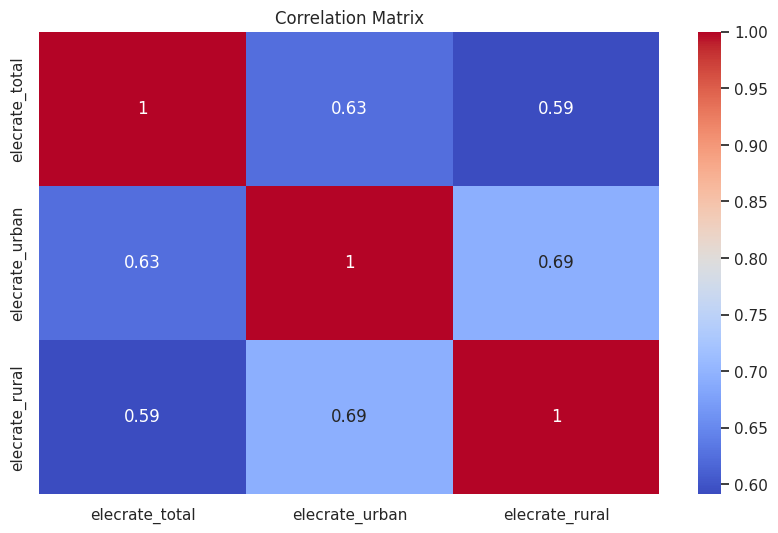

In [23]:
# Assuming df_filled is the filled dataframe
df = df_filled.copy()

# Distribution of electrification rates
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['elecrate_total'], kde=True)
plt.title('Distribution of Total Electrification Rate')
plt.subplot(1, 3, 2)
sns.histplot(df['elecrate_urban'], kde=True)
plt.title('Distribution of Urban Electrification Rate')
plt.subplot(1, 3, 3)
sns.histplot(df['elecrate_rural'], kde=True)
plt.title('Distribution of Rural Electrification Rate')
plt.show()

# Trends over the years
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.lineplot(x='year', y='elecrate_total', data=df.groupby('year')['elecrate_total'].mean().reset_index())
plt.title('Average Total Electrification Rate Over Years')
plt.subplot(1, 3, 2)
sns.lineplot(x='year', y='elecrate_urban', data=df.groupby('year')['elecrate_urban'].mean().reset_index())
plt.title('Average Urban Electrification Rate Over Years')
plt.subplot(1, 3, 3)
sns.lineplot(x='year', y='elecrate_rural', data=df.groupby('year')['elecrate_rural'].mean().reset_index())
plt.title('Average Rural Electrification Rate Over Years')
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['elecrate_total', 'elecrate_urban', 'elecrate_rural']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **Countries with 0-25% Electrification Rate of Households**

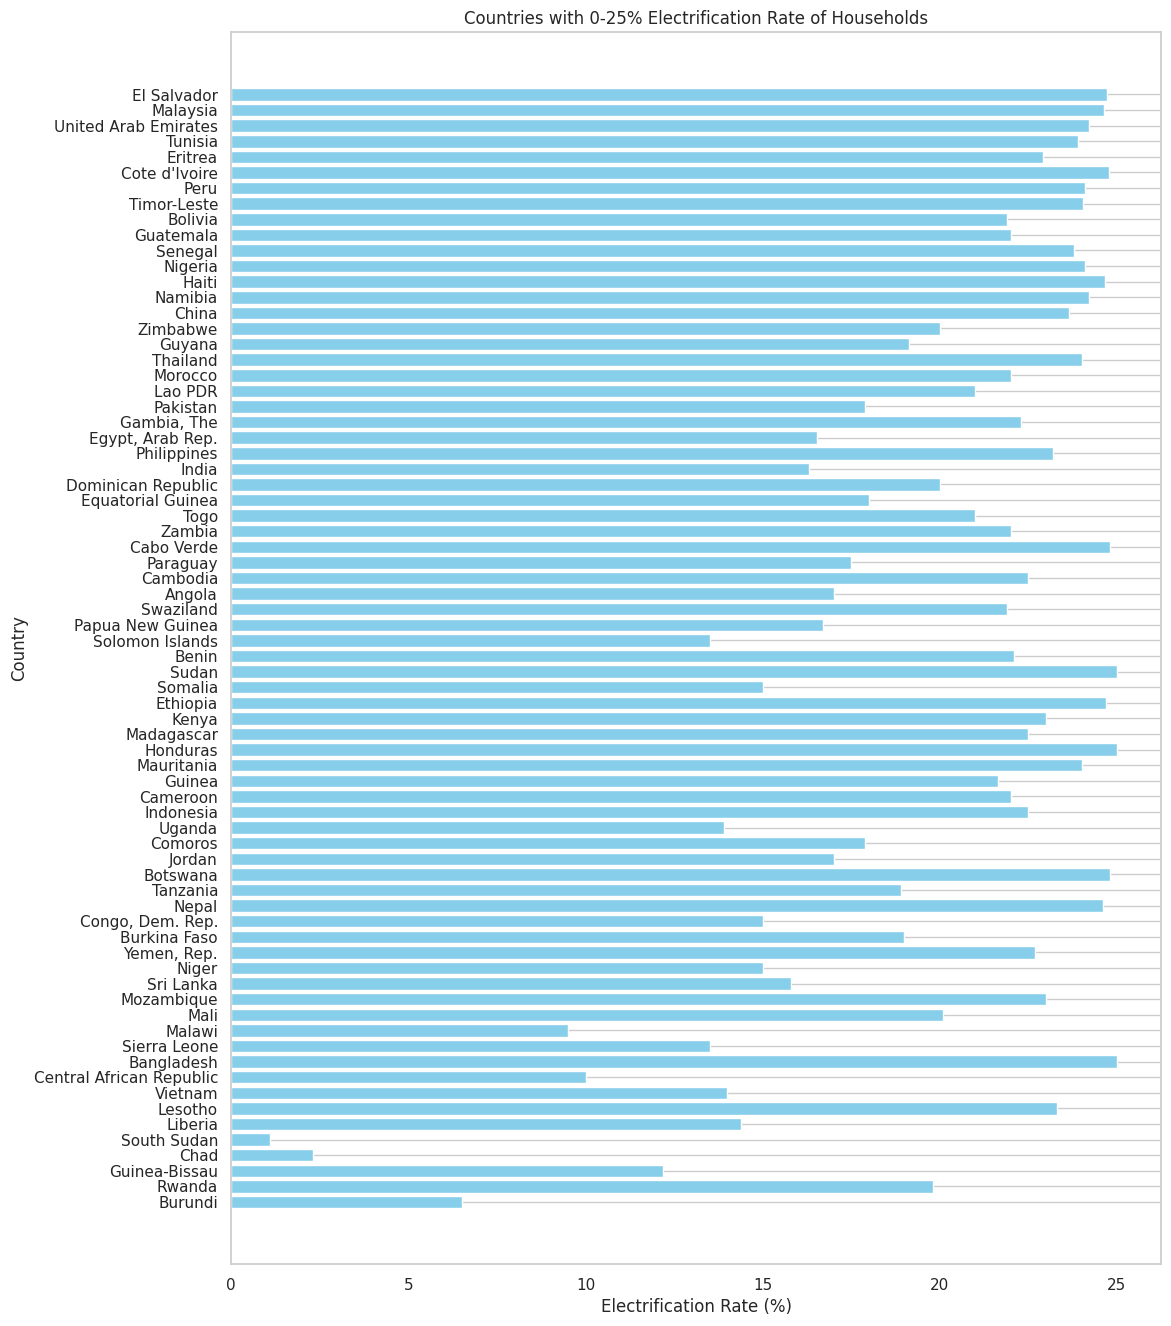

In [24]:
# Filter the dataset for countries with electrification rates between 0 and 25%
df_filtered = df_filled[(df_filled['elecrate_total'] >= 0) & (df_filled['elecrate_total'] <= 25)]

# Sort the filtered dataset by electrification rate in ascending order
df_filtered_sorted = df_filtered.sort_values(by='elecrate_total', ascending=True)

# Visualize the countries with electrification rates between 0 and 25%
plt.figure(figsize=(12, 16))
plt.barh(df_filtered_sorted['countryname'], df_filtered_sorted['elecrate_total'], color= 'skyblue')
plt.xlabel('Electrification Rate (%)')
plt.ylabel('Country')
plt.title('Countries with 0-25% Electrification Rate of Households')
plt.grid(axis='x')
plt.show()


### **Countries with 26-50% Electrification Rate of Households**

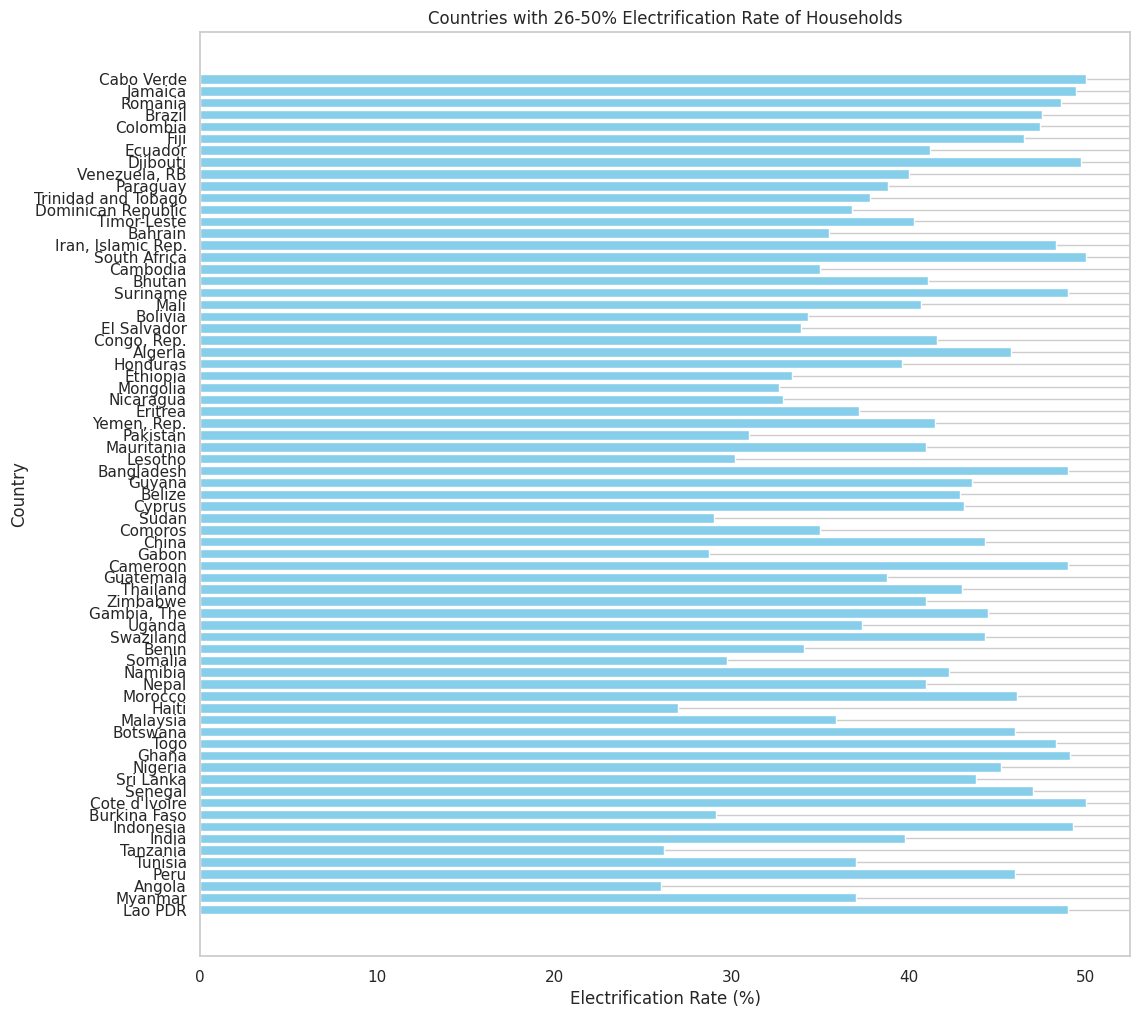

In [25]:
# Filter the dataset for countries with electrification rates between 26 and 50%
df_filtered = df_filled[(df_filled['elecrate_total'] >= 26) & (df_filled['elecrate_total'] <= 50)]

# Sort the filtered dataset by electrification rate in ascending order
df_filtered_sorted = df_filtered.sort_values(by='elecrate_total', ascending=True)

# Visualize the countries with electrification rates between 26 and 50%
plt.figure(figsize=(12, 12))
plt.barh(df_filtered_sorted['countryname'], df_filtered_sorted['elecrate_total'], color='skyblue')
plt.xlabel('Electrification Rate (%)')
plt.ylabel('Country')
plt.title('Countries with 26-50% Electrification Rate of Households')
plt.grid(axis='x')
plt.show()


### **Countries with 51-75% Electrification Rate of Households**

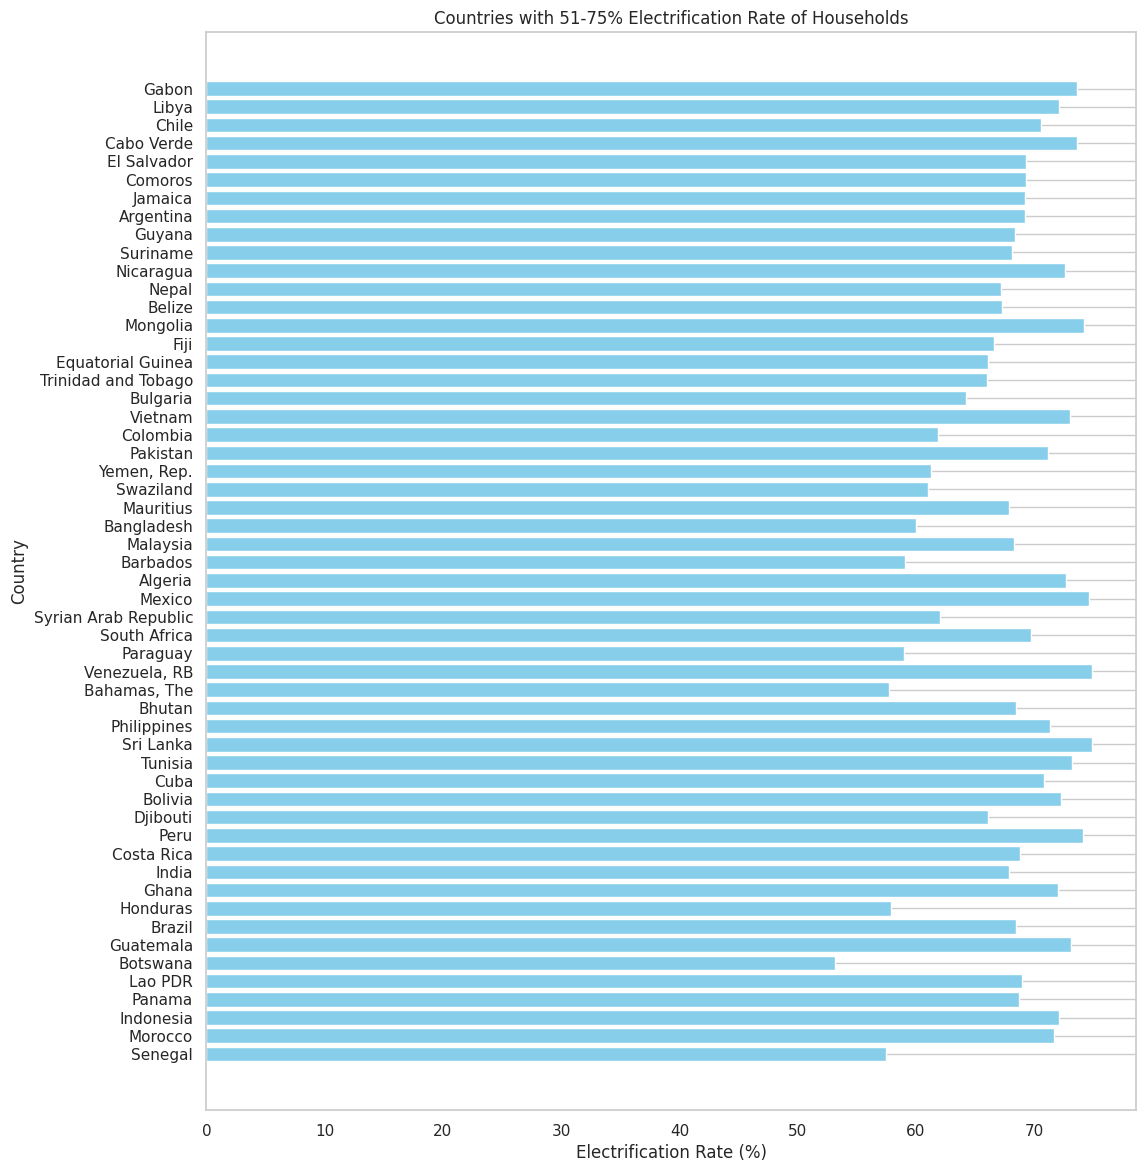

In [26]:
# Filter the dataset for countries with electrification rates between 51 and 75%
df_filtered = df_filled[(df_filled['elecrate_total'] >= 51) & (df_filled['elecrate_total'] <= 75)]

# Sort the filtered dataset by electrification rate in ascending order
df_filtered_sorted = df_filtered.sort_values(by='elecrate_total', ascending=True)

# Visualize the countries with electrification rates between 51 and 75%
plt.figure(figsize=(12, 14))
plt.barh(df_filtered_sorted['countryname'], df_filtered_sorted['elecrate_total'], color='skyblue')
plt.xlabel('Electrification Rate (%)')
plt.ylabel('Country')
plt.title('Countries with 51-75% Electrification Rate of Households')
plt.grid(axis='x')
plt.show()


### **Countries with 76-100% Electrification Rate of Households**

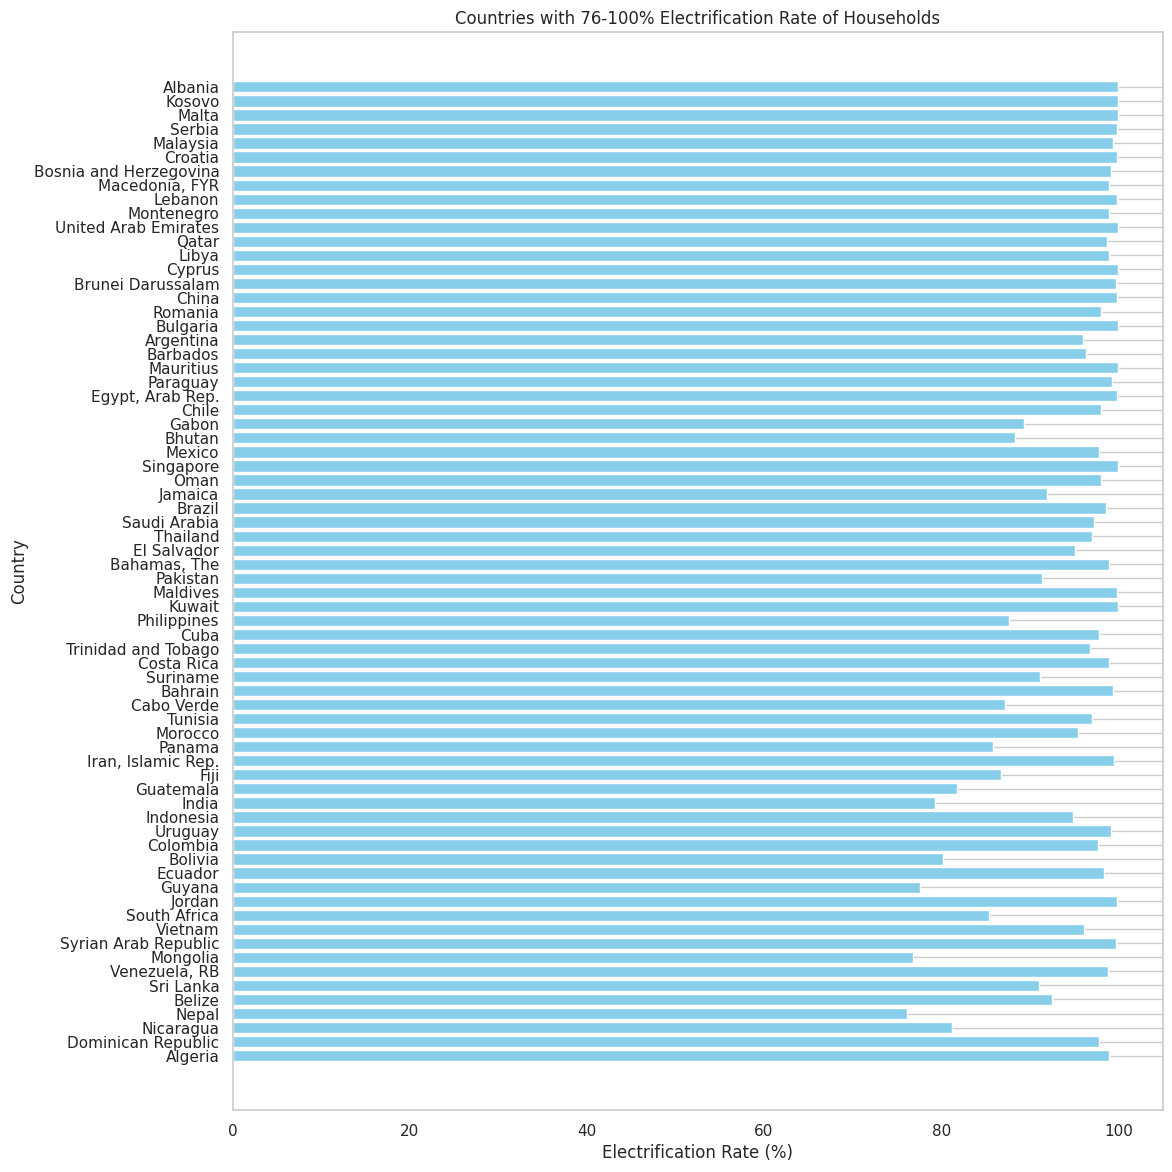

In [27]:
# Filter the dataset for countries with electrification rates between 76% and 100%
df_filtered = df_filled[(df_filled['elecrate_total'] >= 76) & (df_filled['elecrate_total'] <= 100)]

# Sort the filtered dataset by electrification rate in ascending order
df_filtered_sorted = df_filtered.sort_values(by='elecrate_total', ascending=True)

# Visualize the countries with electrification rates between 76% and 100%
plt.figure(figsize=(12, 14))
plt.barh(df_filtered_sorted['countryname'], df_filtered_sorted['elecrate_total'], color='skyblue')
plt.xlabel('Electrification Rate (%)')
plt.ylabel('Country')
plt.title('Countries with 76-100% Electrification Rate of Households')
plt.grid(axis='x')
plt.show()


### **Distribution of Total households Electrification Rates Across Countries**

Countries in the 0-25% range: 336
Countries in the 26-50% range: 241
Countries in the 51-75% range: 123
Countries in the 76-100% range: 335


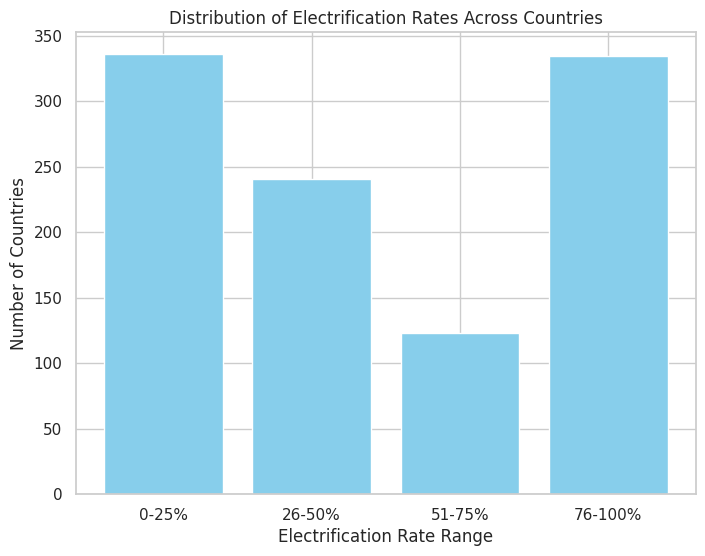

In [28]:
# Define the bins for categorizing electrification rates
bins = [0, 25, 50, 75, 100]

# Create a new column in the DataFrame to represent the bin categories
df_filled['electrification_bin'] = pd.cut(df_filled['elecrate_total'], bins=bins, labels=['0-25%', '26-50%', '51-75%', '76-100%'])

# Count the number of countries in each bin category
bin_counts = df_filled['electrification_bin'].value_counts().sort_index()

# Print the count of countries in each bin category
for bin_category, count in bin_counts.items():
    print(f"Countries in the {bin_category} range: {count}")

# Visualize the distribution of countries across different electrification rate bins
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values, color='skyblue')
plt.xlabel('Electrification Rate Range')
plt.ylabel('Number of Countries')
plt.title('Distribution of Electrification Rates Across Countries')
plt.show()


### **Distribution of Urban households Electrification Rates Across Countries**

Countries in the 0-25% range: 46
Countries in the 26-50% range: 106
Countries in the 51-75% range: 446
Countries in the 76-100% range: 436


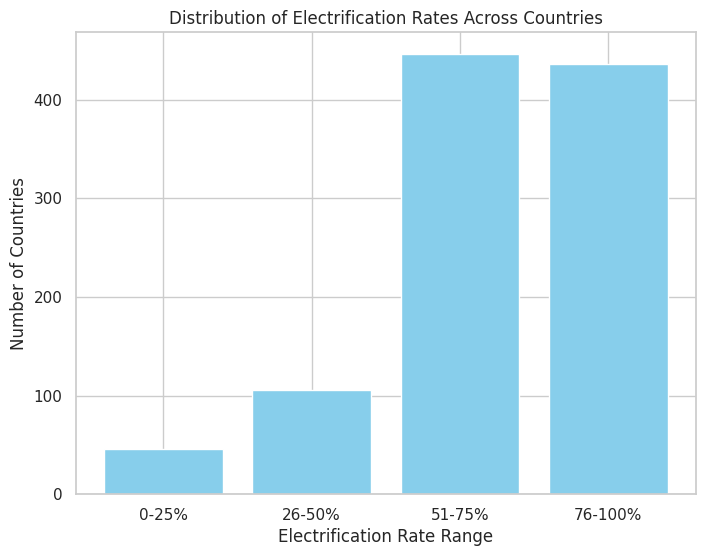

In [29]:
# Define the bins for categorizing electrification rates
bins = [0, 25, 50, 75, 100]

# Create a new column in the DataFrame to represent the bin categories
df_filled['electrification_bin'] = pd.cut(df_filled['elecrate_urban'], bins=bins, labels=['0-25%', '26-50%', '51-75%', '76-100%'])

# Count the number of countries in each bin category
bin_counts = df_filled['electrification_bin'].value_counts().sort_index()

# Print the count of countries in each bin category
for bin_category, count in bin_counts.items():
    print(f"Countries in the {bin_category} range: {count}")

# Visualize the distribution of countries across different electrification rate bins
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values, color='skyblue')
plt.xlabel('Electrification Rate Range')
plt.ylabel('Number of Countries')
plt.title('Distribution of Electrification Rates Across Countries')
plt.show()


### **Distribution of Rural households Electrification Rates Across Countries**

Countries in the 0-25% range: 636
Countries in the 26-50% range: 213
Countries in the 51-75% range: 60
Countries in the 76-100% range: 122


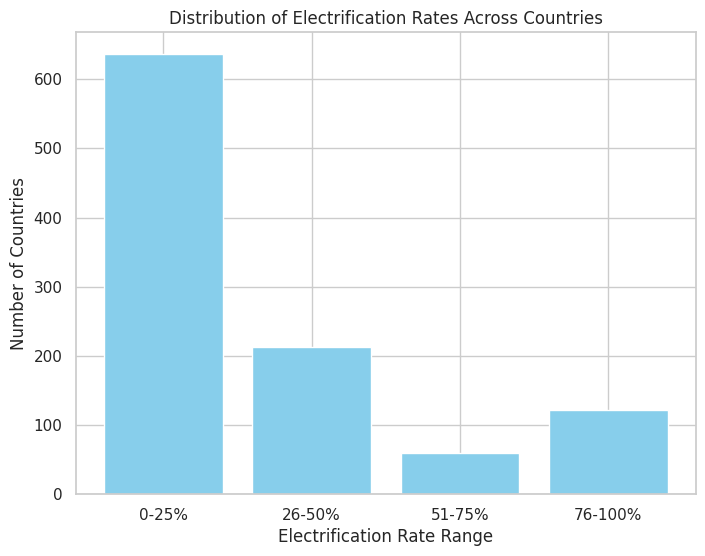

In [30]:
# Define the bins for categorizing electrification rates
bins = [0, 25, 50, 75, 100]

# Create a new column in the DataFrame to represent the bin categories
df_filled['electrification_bin'] = pd.cut(df_filled['elecrate_rural'], bins=bins, labels=['0-25%', '26-50%', '51-75%', '76-100%'])

# Count the number of countries in each bin category
bin_counts = df_filled['electrification_bin'].value_counts().sort_index()

# Print the count of countries in each bin category
for bin_category, count in bin_counts.items():
    print(f"Countries in the {bin_category} range: {count}")

# Visualize the distribution of countries across different electrification rate bins
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values, color='skyblue')
plt.xlabel('Electrification Rate Range')
plt.ylabel('Number of Countries')
plt.title('Distribution of Electrification Rates Across Countries')
plt.show()


## **Feature Engineering**

In [31]:
# Feature Engineering
# Creating lag features to help in time series prediction
df['elecrate_total_lag1'] = df.groupby('countrycode')['elecrate_total'].shift(1)
df['elecrate_urban_lag1'] = df.groupby('countrycode')['elecrate_urban'].shift(1)
df['elecrate_rural_lag1'] = df.groupby('countrycode')['elecrate_rural'].shift(1)

# Drop rows with missing lag features
df = df.dropna().reset_index(drop=True)


In [32]:
df.head(5)

countryname countrycode  year  elecrate_total  elecrate_urban  \
0     Algeria         DZA  1969            40.0       66.964142   
1     Algeria         DZA  1977            45.8       81.084442   
2     Algeria         DZA  1981            59.0       64.229256   
3     Algeria         DZA  1985            76.0       67.694626   
4     Algeria         DZA  1987            72.7       69.543648   

   elecrate_rural  elecrate_total_lag1  elecrate_urban_lag1  \
0       14.424832                 33.7            74.000000   
1       32.651169                 40.0            66.964142   
2       21.311750                 45.8            81.084442   
3       22.905422                 59.0            64.229256   
4       20.488081                 76.0            67.694626   

   elecrate_rural_lag1  
0            11.800000  
1            14.424832  
2            32.651169  
3            21.311750  
4            22.905422

## **Linear Regression**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the dataset for regression
X = df[['year', 'elecrate_total_lag1', 'elecrate_urban_lag1', 'elecrate_rural_lag1']]
y_total = df['elecrate_total']
y_urban = df['elecrate_urban']
y_rural = df['elecrate_rural']

# Split the data into training and test sets
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)
X_train, X_test, y_train_urban, y_test_urban = train_test_split(X, y_urban, test_size=0.2, random_state=42)
X_train, X_test, y_train_rural, y_test_rural = train_test_split(X, y_rural, test_size=0.2, random_state=42)

# Regression Model for Total Electrification Rate
model_total = LinearRegression()
model_total.fit(X_train, y_train_total)
y_pred_total = model_total.predict(X_test)

# Regression Model for Urban Electrification Rate
model_urban = LinearRegression()
model_urban.fit(X_train, y_train_urban)
y_pred_urban = model_urban.predict(X_test)

# Regression Model for Rural Electrification Rate
model_rural = LinearRegression()
model_rural.fit(X_train, y_train_rural)
y_pred_rural = model_rural.predict(X_test)

# Evaluate the models
print("LR Total Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_total, y_pred_total)))
print("LR Urban Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_urban, y_pred_urban)))
print("LR Rural Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_rural, y_pred_rural)))


LR Total Electrification Rate RMSE: 10.883585786666739
LR Urban Electrification Rate RMSE: 13.98888168867095
LR Rural Electrification Rate RMSE: 18.166595650768276


In [34]:
# Prepare features for forecasting
years_forecast = np.arange(2010, 2027).reshape(-1, 1)  # Years from 2010 to 2026

# Include lagged electrification rates features for forecasting
X_forecast = np.hstack((years_forecast, np.zeros((years_forecast.shape[0], 3))))  # Initialize lagged features with zeros
X_forecast[:, 1] = y_pred_total[-17:]  # Use predicted total electrification rates as lagged feature for total electrification rate
X_forecast[:, 2] = y_pred_urban[-17:]  # Use predicted urban electrification rates as lagged feature for urban electrification rate
X_forecast[:, 3] = y_pred_rural[-17:]  # Use predicted rural electrification rates as lagged feature for rural electrification rate

# Predict forecasts
lr_forecast_total = model_total.predict(X_forecast)
lr_forecast_urban = model_urban.predict(X_forecast)
lr_forecast_rural = model_rural.predict(X_forecast)

# Print forecasts
print("Forecasted Total Electrification Rate for 2010-2026:", lr_forecast_total)
print("Forecasted Urban Electrification Rate for 2010-2026:", lr_forecast_urban)
print("Forecasted Rural Electrification Rate for 2010-2026:", lr_forecast_rural)


Forecasted Total Electrification Rate for 2010-2026: [34.42607251 77.71504908 14.65858356 91.64349369 77.13455721 88.16266155
 52.51716471 82.15030087 38.71031523 96.97276633 96.68865566 73.56577255
 19.97316163 74.49337803 24.64692963 14.38025706 23.39583055]
Forecasted Urban Electrification Rate for 2010-2026: [67.53847457 84.37440714 50.34195394 83.26160643 77.22285536 78.86043374
 73.30732015 80.36633984 67.41526851 80.59799266 80.73639139 75.19150587
 59.99757863 79.94822675 57.61646888 60.63356353 65.97784827]
Forecasted Rural Electrification Rate for 2010-2026: [22.99489153 35.27951462  9.21835401 44.12152606 36.22253187 39.05372342
 30.28132135 40.80614627 17.55221241 40.88022461 44.70281442 36.18301631
 14.86622864 42.15119413 11.72551963 16.50632544 20.64131194]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Visualization for every country**

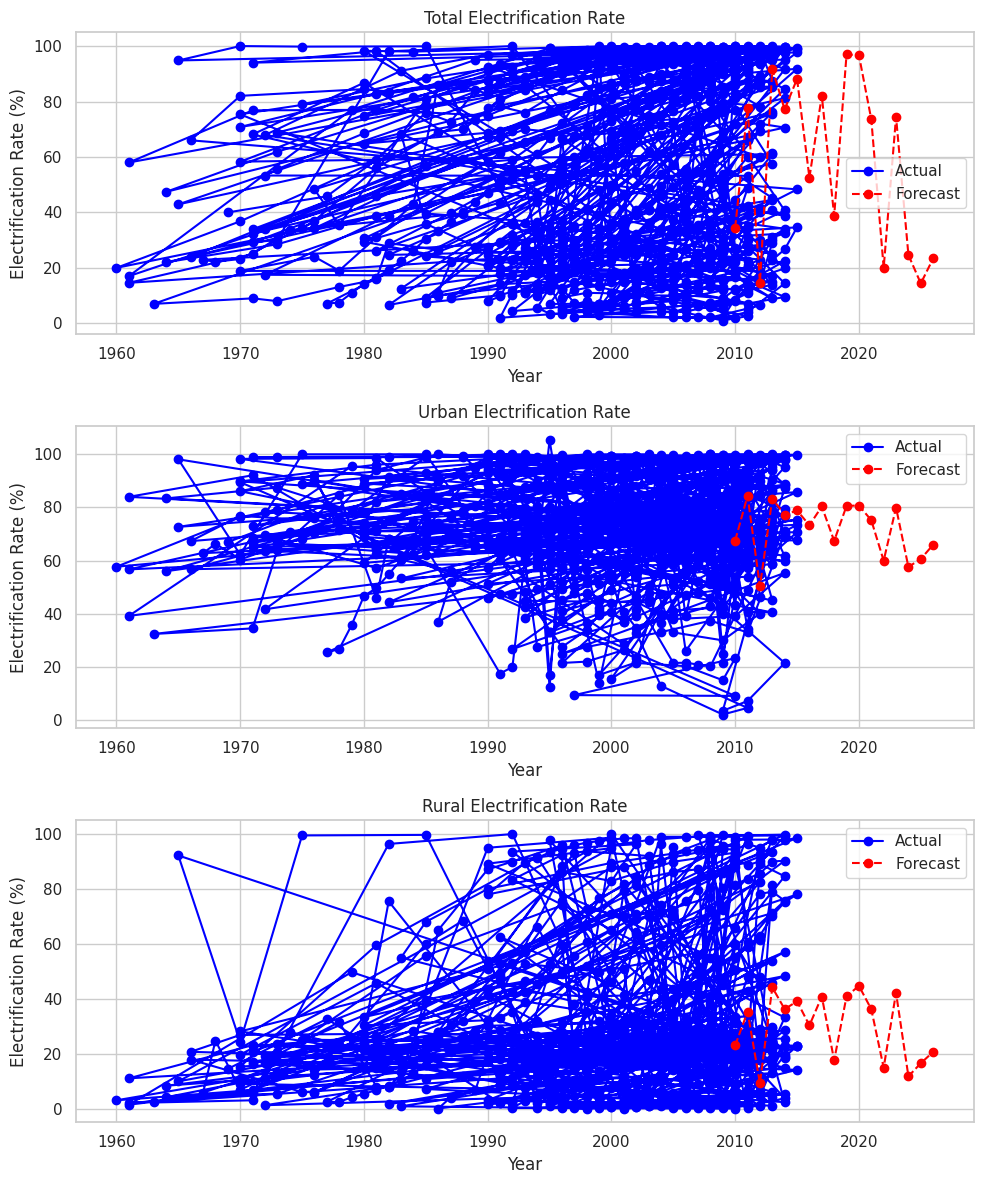

In [37]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Actual Total Electrification Rate
if 'elecrate_total' in df.columns:
    ax1.plot(df['year'], df['elecrate_total'], label='Actual', marker='o', color='blue')
ax1.plot(years_forecast, lr_forecast_total, label='Forecast', marker='o', linestyle='--', color='red')
ax1.set_title('Total Electrification Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Electrification Rate (%)')
ax1.legend()
ax1.grid(True)

# Plot Actual Urban Electrification Rate
if 'elecrate_urban' in df.columns:
    ax2.plot(df['year'], df['elecrate_urban'], label='Actual', marker='o', color='blue')
ax2.plot(years_forecast, lr_forecast_urban, label='Forecast', marker='o', linestyle='--', color='red')
ax2.set_title('Urban Electrification Rate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Electrification Rate (%)')
ax2.legend()
ax2.grid(True)

# Plot Actual Rural Electrification Rate
if 'elecrate_rural' in df.columns:
    ax3.plot(df['year'], df['elecrate_rural'], label='Actual', marker='o', color='blue')
ax3.plot(years_forecast, lr_forecast_rural, label='Forecast', marker='o', linestyle='--', color='red')
ax3.set_title('Rural Electrification Rate')
ax3.set_xlabel('Year')
ax3.set_ylabel('Electrification Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


### **Visualization for 1 country**

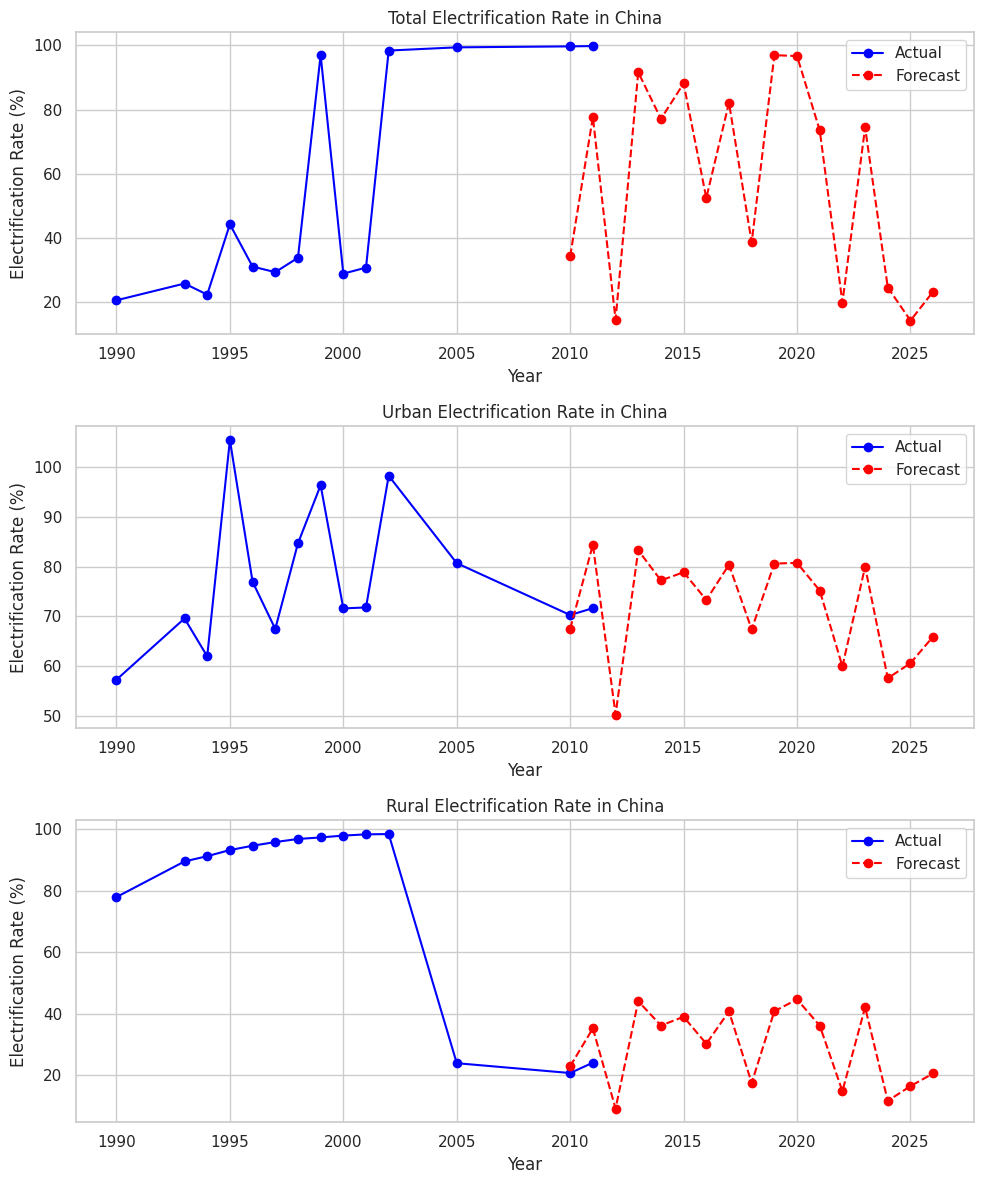

In [39]:
import matplotlib.pyplot as plt

# Filter data for China
df_china = df[df['countrycode'] == 'CHN']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Actual Total Electrification Rate
if 'elecrate_total' in df_china.columns:
    ax1.plot(df_china['year'], df_china['elecrate_total'], label='Actual', marker='o', color='blue')
ax1.plot(years_forecast, lr_forecast_total, label='Forecast', marker='o', linestyle='--', color='red')
ax1.set_title('Total Electrification Rate in China')
ax1.set_xlabel('Year')
ax1.set_ylabel('Electrification Rate (%)')
ax1.legend()
ax1.grid(True)

# Plot Actual Urban Electrification Rate
if 'elecrate_urban' in df_china.columns:
    ax2.plot(df_china['year'], df_china['elecrate_urban'], label='Actual', marker='o', color='blue')
ax2.plot(years_forecast, lr_forecast_urban, label='Forecast', marker='o', linestyle='--', color='red')
ax2.set_title('Urban Electrification Rate in China')
ax2.set_xlabel('Year')
ax2.set_ylabel('Electrification Rate (%)')
ax2.legend()
ax2.grid(True)

# Plot Actual Rural Electrification Rate
if 'elecrate_rural' in df_china.columns:
    ax3.plot(df_china['year'], df_china['elecrate_rural'], label='Actual', marker='o', color='blue')
ax3.plot(years_forecast, lr_forecast_rural, label='Forecast', marker='o', linestyle='--', color='red')
ax3.set_title('Rural Electrification Rate in China')
ax3.set_xlabel('Year')
ax3.set_ylabel('Electrification Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


In [40]:
# Display unique country codes in the dataset
print(df['countrycode'].unique())

['DZA' 'AGO' 'ARG' 'BHS' 'BHR' 'BGD' 'BRB' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH'
 'BWA' 'BRA' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAF' 'TCD' 'CHL'
 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CYP' 'DJI' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'ETH' 'FJI' 'GAB' 'GMB' 'GHA' 'GTM' 'GIN'
 'GNB' 'GUY' 'HTI' 'HND' 'IND' 'IDN' 'IRN' 'JAM' 'JOR' 'KEN' 'KWT' 'LAO'
 'LBN' 'LSO' 'LBR' 'LBY' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS'
 'MEX' 'MNG' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NIC' 'NER' 'NGA' 'OMN' 'PAK'
 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'QAT' 'ROU' 'RWA' 'SAU' 'SEN' 'SRB' 'SLE'
 'SGP' 'SLB' 'SOM' 'ZAF' 'LKA' 'SDN' 'SUR' 'SWZ' 'SYR' 'TZA' 'THA' 'TLS'
 'TGO' 'TTO' 'TUN' 'UGA' 'ARE' 'URY' 'VEN' 'VNM' 'YEM' 'ZMB' 'ZWE']


-----------------------------

# **`Random Forest`**

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Random Forest Regression Model for Total Electrification Rate
model_total = RandomForestRegressor(n_estimators=100, random_state=42)
model_total.fit(X_train, y_train_total)
y_pred_total = model_total.predict(X_test)

# Random Forest Regression Model for Urban Electrification Rate
model_urban = RandomForestRegressor(n_estimators=100, random_state=42)
model_urban.fit(X_train, y_train_urban)
y_pred_urban = model_urban.predict(X_test)

# Random Forest Regression Model for Rural Electrification Rate
model_rural = RandomForestRegressor(n_estimators=100, random_state=42)
model_rural.fit(X_train, y_train_rural)
y_pred_rural = model_rural.predict(X_test)

# Evaluate the models
print("RF Total Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_total, y_pred_total)))
print("RF Urban Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_urban, y_pred_urban)))
print("RF Rural Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_rural, y_pred_rural)))


RF Total Electrification Rate RMSE: 11.615328319849624
RF Urban Electrification Rate RMSE: 14.535068988683044
RF Rural Electrification Rate RMSE: 18.354561235383915


In [42]:
# Prepare features for forecasting
years_forecast = np.arange(2010, 2027).reshape(-1, 1)  # Years from 2010 to 2026

# Include lagged electrification rates features for forecasting
X_forecast = np.hstack((years_forecast, np.zeros((years_forecast.shape[0], 3))))  # Initialize lagged features with zeros
X_forecast[:, 1] = y_pred_total[-17:]  # Use predicted total electrification rates as lagged feature for total electrification rate
X_forecast[:, 2] = y_pred_urban[-17:]  # Use predicted urban electrification rates as lagged feature for urban electrification rate
X_forecast[:, 3] = y_pred_rural[-17:]  # Use predicted rural electrification rates as lagged feature for rural electrification rate

# Predict forecasts
rf_forecast_total = model_total.predict(X_forecast)
rf_forecast_urban = model_urban.predict(X_forecast)
rf_forecast_rural = model_rural.predict(X_forecast)

# Print forecasts
print("Forecasted Total Electrification Rate for 2010-2026:", rf_forecast_total)
print("Forecasted Urban Electrification Rate for 2010-2026:", rf_forecast_urban)
print("Forecasted Rural Electrification Rate for 2010-2026:", rf_forecast_rural)


Forecasted Total Electrification Rate for 2010-2026: [39.52414546 74.94286437  6.312      92.0049     85.3712     90.393
 60.063      85.6678     33.40777277 99.457      97.36957603 83.50967192
 19.00378582 83.34897192 22.9446163  10.0165     23.68066889]
Forecasted Urban Electrification Rate for 2010-2026: [71.68260536 85.97425685 40.8199708  72.51362852 71.68262746 78.08058586
 78.13526836 68.35241879 68.77338255 81.31296449 85.50616695 77.3442263
 56.56699259 86.23343751 65.02769851 62.86122995 69.65902672]
Forecasted Rural Electrification Rate for 2010-2026: [19.71235003 44.52092018  7.26628415 29.47689909 30.91569338 37.03668285
 31.95295088 31.05774802 16.50250454 48.71387865 57.00086409 38.67797812
  8.47232346 49.09054354  8.10900256 10.45368886 12.74406218]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


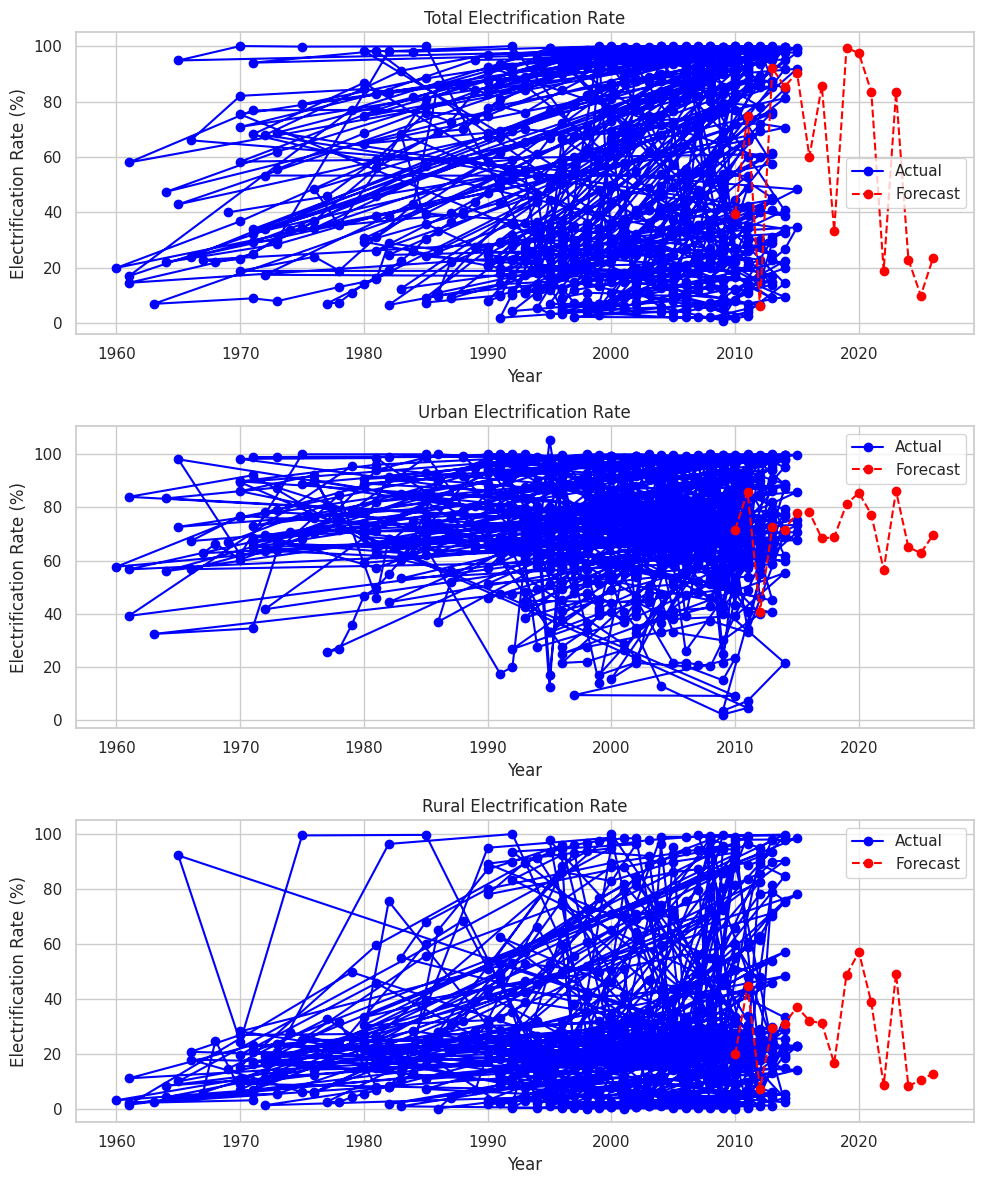

In [43]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Actual Total Electrification Rate
if 'elecrate_total' in df.columns:
    ax1.plot(df['year'], df['elecrate_total'], label='Actual', marker='o', color='blue')
ax1.plot(years_forecast, rf_forecast_total, label='Forecast', marker='o', linestyle='--', color='red')
ax1.set_title('Total Electrification Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Electrification Rate (%)')
ax1.legend()
ax1.grid(True)

# Plot Actual Urban Electrification Rate
if 'elecrate_urban' in df.columns:
    ax2.plot(df['year'], df['elecrate_urban'], label='Actual', marker='o', color='blue')
ax2.plot(years_forecast, rf_forecast_urban, label='Forecast', marker='o', linestyle='--', color='red')
ax2.set_title('Urban Electrification Rate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Electrification Rate (%)')
ax2.legend()
ax2.grid(True)

# Plot Actual Rural Electrification Rate
if 'elecrate_rural' in df.columns:
    ax3.plot(df['year'], df['elecrate_rural'], label='Actual', marker='o', color='blue')
ax3.plot(years_forecast, rf_forecast_rural, label='Forecast', marker='o', linestyle='--', color='red')
ax3.set_title('Rural Electrification Rate')
ax3.set_xlabel('Year')
ax3.set_ylabel('Electrification Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


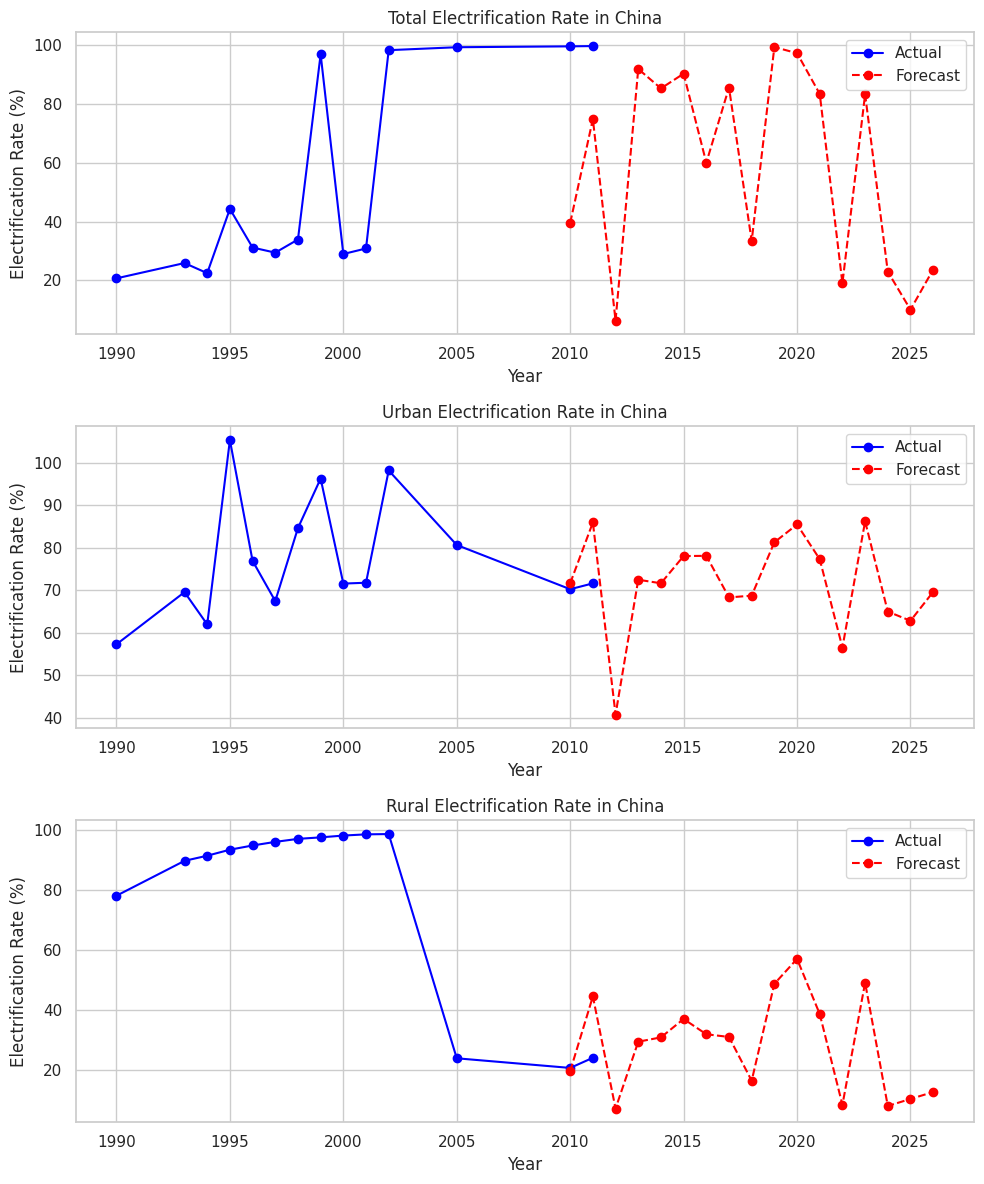

In [44]:
# Filter data for China
df_china = df[df['countrycode'] == 'CHN']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Actual Total Electrification Rate
if 'elecrate_total' in df_china.columns:
    ax1.plot(df_china['year'], df_china['elecrate_total'], label='Actual', marker='o', color='blue')
ax1.plot(years_forecast, rf_forecast_total, label='Forecast', marker='o', linestyle='--', color='red')
ax1.set_title('Total Electrification Rate in China')
ax1.set_xlabel('Year')
ax1.set_ylabel('Electrification Rate (%)')
ax1.legend()
ax1.grid(True)

# Plot Actual Urban Electrification Rate
if 'elecrate_urban' in df_china.columns:
    ax2.plot(df_china['year'], df_china['elecrate_urban'], label='Actual', marker='o', color='blue')
ax2.plot(years_forecast, rf_forecast_urban, label='Forecast', marker='o', linestyle='--', color='red')
ax2.set_title('Urban Electrification Rate in China')
ax2.set_xlabel('Year')
ax2.set_ylabel('Electrification Rate (%)')
ax2.legend()
ax2.grid(True)

# Plot Actual Rural Electrification Rate
if 'elecrate_rural' in df_china.columns:
    ax3.plot(df_china['year'], df_china['elecrate_rural'], label='Actual', marker='o', color='blue')
ax3.plot(years_forecast, rf_forecast_rural, label='Forecast', marker='o', linestyle='--', color='red')
ax3.set_title('Rural Electrification Rate in China')
ax3.set_xlabel('Year')
ax3.set_ylabel('Electrification Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


# **Gradient Boosting**

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gradient Boosting Regression Model for Total Electrification Rate
model_total = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_total.fit(X_train, y_train_total)
y_pred_total = model_total.predict(X_test)

# Gradient Boosting Regression Model for Urban Electrification Rate
model_urban = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_urban.fit(X_train, y_train_urban)
y_pred_urban = model_urban.predict(X_test)

# Gradient Boosting Regression Model for Rural Electrification Rate
model_rural = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_rural.fit(X_train, y_train_rural)
y_pred_rural = model_rural.predict(X_test)

# Evaluate the models
print("GB Total Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_total, y_pred_total)))
print("GB Urban Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_urban, y_pred_urban)))
print("GB Rural Electrification Rate RMSE:", np.sqrt(mean_squared_error(y_test_rural, y_pred_rural)))


GB Total Electrification Rate RMSE: 11.415898289548945
GB Urban Electrification Rate RMSE: 13.945113203847567
GB Rural Electrification Rate RMSE: 17.825445792817323


In [49]:
# Prepare features for forecasting
years_forecast = np.arange(2010, 2027).reshape(-1, 1)  # Years from 2010 to 2026

# Include lagged electrification rates features for forecasting
X_forecast = np.hstack((years_forecast, np.zeros((years_forecast.shape[0], 3))))  # Initialize lagged features with zeros
X_forecast[:, 1] = y_pred_total[-17:]  # Use predicted total electrification rates as lagged feature for total electrification rate
X_forecast[:, 2] = y_pred_urban[-17:]  # Use predicted urban electrification rates as lagged feature for urban electrification rate
X_forecast[:, 3] = y_pred_rural[-17:]  # Use predicted rural electrification rates as lagged feature for rural electrification rate

# Predict forecasts
gb_forecast_total = model_total.predict(X_forecast)
gb_forecast_urban = model_urban.predict(X_forecast)
gb_forecast_rural = model_rural.predict(X_forecast)

# Print forecasts
print("Forecasted Total Electrification Rate for 2010-2026:", gb_forecast_total)
print("Forecasted Urban Electrification Rate for 2010-2026:", gb_forecast_urban)
print("Forecasted Rural Electrification Rate for 2010-2026:", gb_forecast_rural)

Forecasted Total Electrification Rate for 2010-2026: [34.41196283 69.4136649   8.13335769 95.46323875 84.57456161 91.51307622
 58.41478022 87.70532917 41.26683273 96.39490602 94.88149744 86.40024864
 18.13646231 83.74554269 34.33840944 14.32151447 20.0884736 ]
Forecasted Urban Electrification Rate for 2010-2026: [74.2028377  87.01124359 41.37623058 78.86920463 77.01906925 78.69378686
 77.58827167 77.2107282  70.33367155 78.98824953 81.71322243 79.49188739
 55.47080686 88.13230505 73.85942536 56.09774262 69.10604757]
Forecasted Rural Electrification Rate for 2010-2026: [22.92829072 43.20768792  6.99826773 40.53217985 30.0409569  35.16598658
 33.55880316 28.36873043 17.70698707 30.14598033 67.71388916 28.16957235
 12.17795728 52.35695589 13.18247766 16.86875459  9.58365468]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


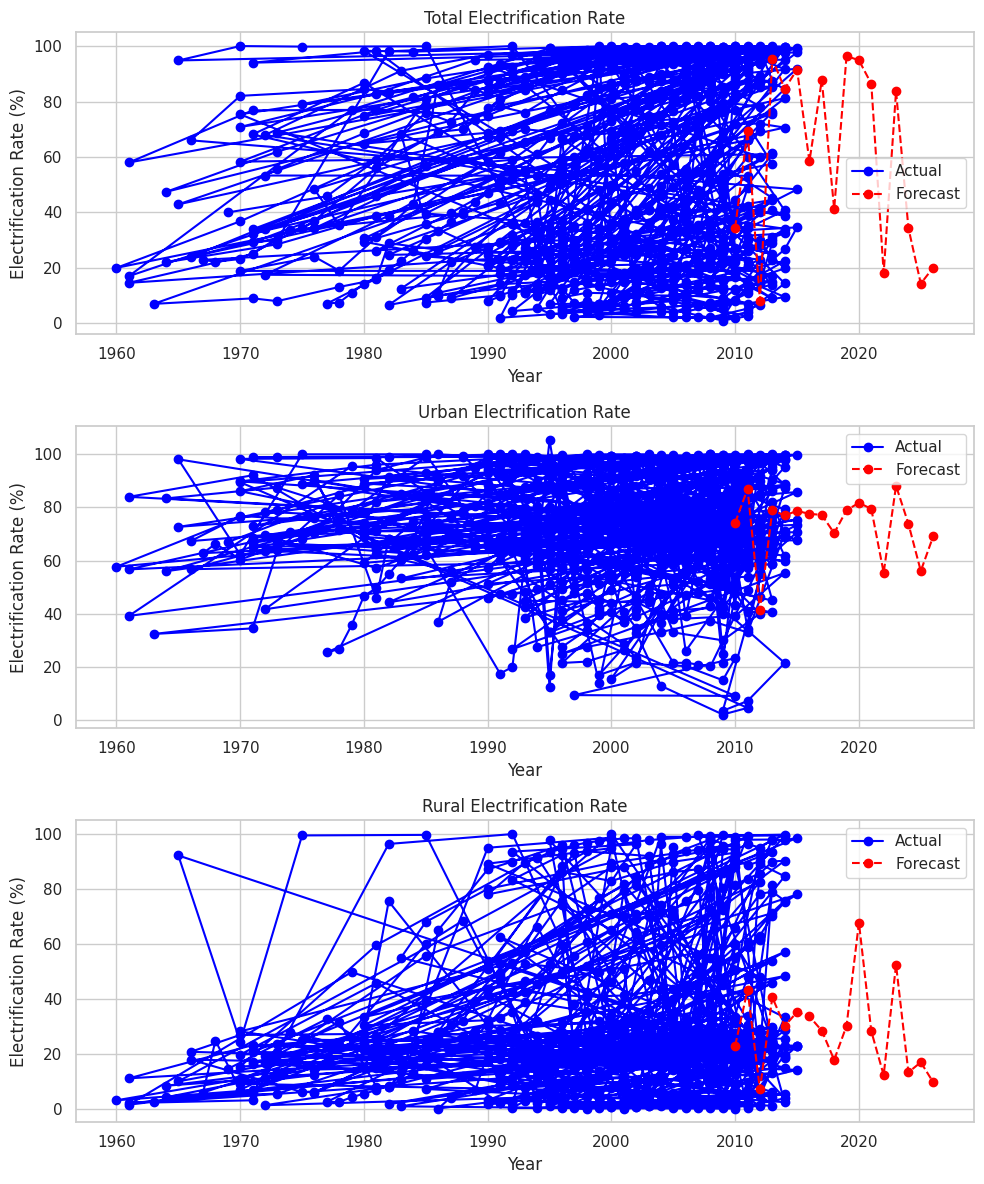

In [51]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Actual Total Electrification Rate
if 'elecrate_total' in df.columns:
    ax1.plot(df['year'], df['elecrate_total'], label='Actual', marker='o', color='blue')
ax1.plot(years_forecast, gb_forecast_total, label='Forecast', marker='o', linestyle='--', color='red')
ax1.set_title('Total Electrification Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Electrification Rate (%)')
ax1.legend()
ax1.grid(True)

# Plot Actual Urban Electrification Rate
if 'elecrate_urban' in df.columns:
    ax2.plot(df['year'], df['elecrate_urban'], label='Actual', marker='o', color='blue')
ax2.plot(years_forecast, gb_forecast_urban, label='Forecast', marker='o', linestyle='--', color='red')
ax2.set_title('Urban Electrification Rate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Electrification Rate (%)')
ax2.legend()
ax2.grid(True)

# Plot Actual Rural Electrification Rate
if 'elecrate_rural' in df.columns:
    ax3.plot(df['year'], df['elecrate_rural'], label='Actual', marker='o', color='blue')
ax3.plot(years_forecast, gb_forecast_rural, label='Forecast', marker='o', linestyle='--', color='red')
ax3.set_title('Rural Electrification Rate')
ax3.set_xlabel('Year')
ax3.set_ylabel('Electrification Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


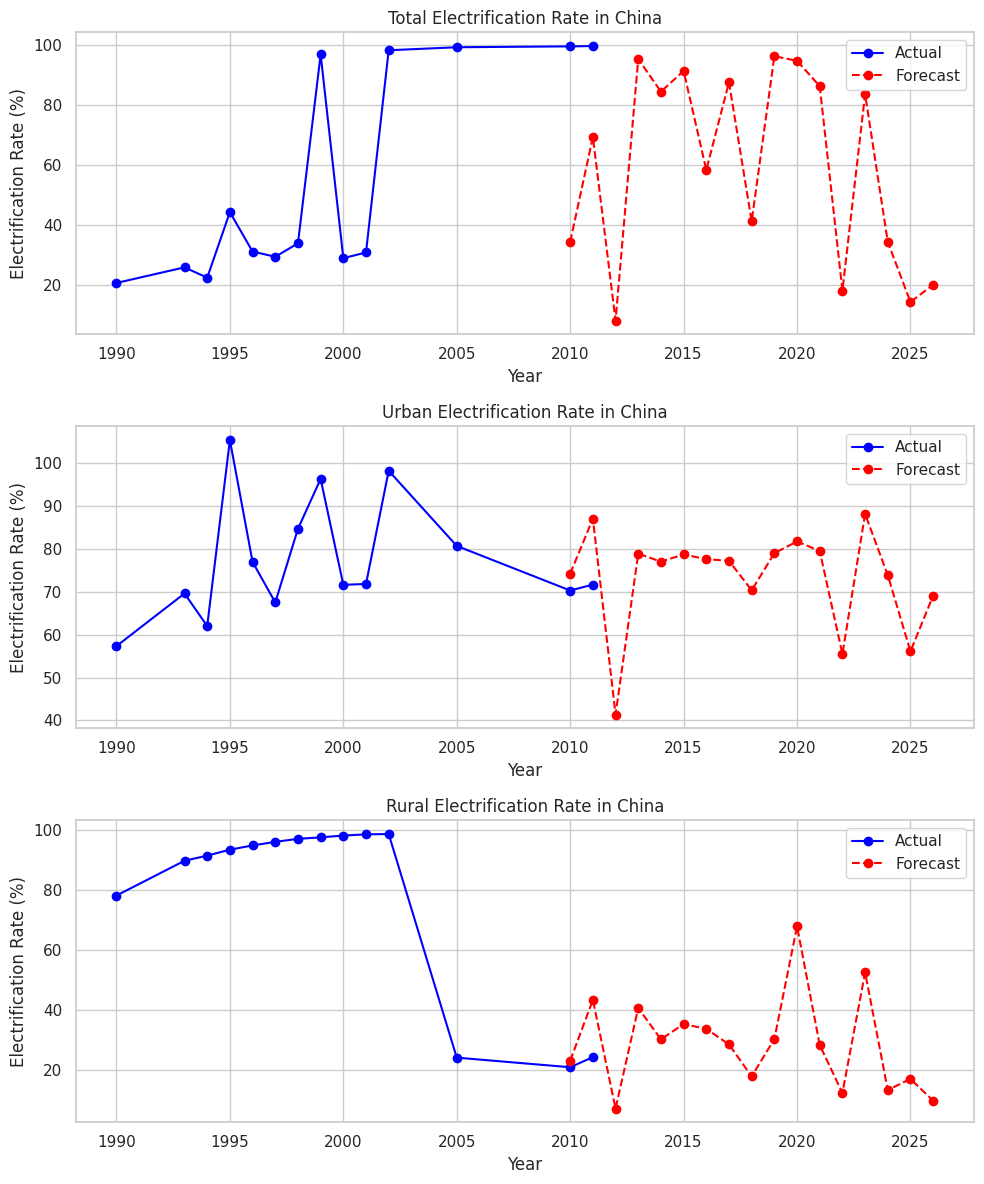

In [52]:
# Filter data for China
df_china = df[df['countrycode'] == 'CHN']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Actual Total Electrification Rate
if 'elecrate_total' in df_china.columns:
    ax1.plot(df_china['year'], df_china['elecrate_total'], label='Actual', marker='o', color='blue')
ax1.plot(years_forecast, gb_forecast_total, label='Forecast', marker='o', linestyle='--', color='red')
ax1.set_title('Total Electrification Rate in China')
ax1.set_xlabel('Year')
ax1.set_ylabel('Electrification Rate (%)')
ax1.legend()
ax1.grid(True)

# Plot Actual Urban Electrification Rate
if 'elecrate_urban' in df_china.columns:
    ax2.plot(df_china['year'], df_china['elecrate_urban'], label='Actual', marker='o', color='blue')
ax2.plot(years_forecast, gb_forecast_urban, label='Forecast', marker='o', linestyle='--', color='red')
ax2.set_title('Urban Electrification Rate in China')
ax2.set_xlabel('Year')
ax2.set_ylabel('Electrification Rate (%)')
ax2.legend()
ax2.grid(True)

# Plot Actual Rural Electrification Rate
if 'elecrate_rural' in df_china.columns:
    ax3.plot(df_china['year'], df_china['elecrate_rural'], label='Actual', marker='o', color='blue')
ax3.plot(years_forecast, gb_forecast_rural, label='Forecast', marker='o', linestyle='--', color='red')
ax3.set_title('Rural Electrification Rate in China')
ax3.set_xlabel('Year')
ax3.set_ylabel('Electrification Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()
